 ## Table of Contents
1. [Introduction](#introduction)
2. [Getting Started](#start) <br>
    2.1 [Importing Libraries](#library) <br>
    2.2 [Import Datasets](#data) <br>
    2.3 [Take a Peek at the Dataset](#data1)<br>
3. [Pre-data cleaning, Pre-EDA](#plot)<br>
    3.1 [Plotting Some Counts for each variable](#count) <br>
    3.2 [Compare Independent Variables with our output - Survived](#survive)<br>
    3.2.1 [Gender vs Survived](#gender) <br>
    3.2.2 [Pclass vs Survived](#pclass) <br>
    3.2.3 [Embarked vs Survived](#embarked)<br>
    3.2.4 [Age vs Survived](#age)<br>
    3.2.5 [Fare vs Survived](#fare)<br>
    3.3 [Correlation Matrix](#corr) <br>
4. [Feature Engineering](#eng) <br>
    4.1 [Imputation](#imp) <br>
    4.1.1 [Missing Fares](#fare)<br>
    4.1.2 [Missing Embarked](#emb)<br>
    4.1.3 [Missing Age](#age)<br>
    4.2 [Outliers](#out) <br>
    4.3 [Drop Features](#drop)<br>
    4.3.1 [Passenger ID](#id)<br>
    4.3.2 [Ticket](#ticket)<br>
    4.3.3 [Name](#name)<br>
    4.3.4 [Cabin](#cab)<br>
    4.4 [Binning?](#bin) <br>
    4.5 [Encoding](#enc) <br>
    4.6 [Feature Scaling](#scale) <br>
5. [Machine Learning Modelling](#model)<br>
    5.0 [Pre-Modeling Final Touch Up](#pre)<br>
    5.0.1 [Dropping Useless Features](#drop)<br>
    5.0.2 [Separating dependent and independent variables](#sep)<br>
    5.0.3 [Train Test Split VS Cross Validation](#split)<br>
    5.0.4 [Feature Scaling](#scale)<br>
    5.0.5 [Using Train Test Split for Logistic Regression](#logreg)<br>
    5.1 [Logistic Regression](#log) <br>
    5.1.1 [Choose CV method](#cv) <br>
    5.1.2 [Model Accuracy](#Accuracy)<br>
    5.1.3 [ROC and AUC](#roc)<br>
    5.1.4 [Stratified Cross Validation](#stratified)<br>
6. [Other Machine Learning Models](#classifications)<br>
    6.1 [KNN](#knn)<br>
    6.2 [Support Vector Machine](#SVM) <br>
    6.3 [Decision Tree](#dt)<br>
    6.4 [Random Forest](#rf) <br>
7. [Part 1: Intuitive explanation of Logistic Regression](#ls)
8. [Part 2: Maximum Likelihood](#ls2)
    

# 1. Introduction to Machine Learning

In this lecture, we will explore the foundational concepts of machine learning using Python. Machine learning allows computers to learn from data and make predictions or decisions without being explicitly programmed. We will focus on supervised learning, which involves using labeled datasets to train models that can make predictions.

The dataset we will use for this session is the famous Titanic dataset, which contains information about passengers on the Titanic and whether they survived or not. This dataset is widely used for introductory machine learning because it presents various types of variables (numeric, categorical, missing data), allowing us to explore key techniques for data analysis, feature engineering, and machine learning modeling.

## Objectives of this Notebook

Throughout this notebook, we will:

1. **Explore and Clean the Data**: We will perform basic exploratory data analysis (EDA), identify missing values, outliers, and make decisions on how to handle them.
   
2. **Feature Engineering**: This step involves preparing the data by selecting important features, encoding categorical variables, and scaling features when needed.

3. **Train Machine Learning Models**: Using cleaned and engineered features, we will train various machine learning models including:
   - Logistic Regression
   - K-Nearest Neighbors (KNN)
   - Support Vector Machines (SVM)
   - Decision Trees
   - Random Forests

4. **Evaluate Model Performance**: We'll evaluate the performance of the models using accuracy, ROC-AUC, and other relevant metrics. We will also introduce concepts like cross-validation and discuss how these techniques improve model generalization.

By the end of this lecture, you will have a solid understanding of the basic steps involved in building, evaluating, and interpreting machine learning models.


## 2) **Getting Started** <a id="start"></a>

### 2.1) Importing Libraries <a id="library"></a>

This is our very first step, we shall import the necessary libraries that we want into python. We can add libraries along the way. Always import the basic libraries first.

In [1418]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
#from pandas.tools.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### 2.2) Import Datasets <a id="data"></a>

Our second step is to import our dataset. 
<br>


In [22]:
!ls ../../data/raw

__init__.py         googleplaystore.csv titanic.csv         tweet_emotions.csv


In [24]:
data = pd.read_csv('../../data/raw/titanic.csv')

### 2.3) Peeking at Datasets <a id="data1"></a>

We view the first 5 and last 5 rows of the data frame to have an idea of how the data is presented.
We also check train.info() to see the data types, and from there we also can get a rough idea which column have missing values, as indicated by non-nulls.

<br>

It is always a good habit to run these codes because we want to get a good idea of what data types we are dealing with. Sometimes data types may come in wrong formats which make data analysis difficult, for instance a column supposed to contain numeric data may be stored as string or a column supposed to contain categorical data stored as a string. Note since we are dealing extensively with Pandas, one can google the **astype** function to get a good idea on coverting data types.

In [27]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### **Data Types are Important for EDA**

From the above:

There are 5 object features: Name, Sex, Ticket, Cabin and Embarked.

- Two of them: Cabin and Ticket are mixed type (numbers+ string)
- Sex is binary category
- Embarked is category
- Name is text

There are 6 numeric features: Pclass, Age, PassengerID, SibSp, Parch, Fare.

- Age and Fare are continuous
- Pclass is ordinal category
- SibSp and Parch are discrete ordinal
- Target: Survived is binary categorical

**Checking on you: Why do we need to pay particular attention to the data types? How are they important?**

Refer: https://towardsdatascience.com/data-types-in-statistics-347e152e8bee



In [30]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Either train.count() or train.info() gives you a rough idea on how many missing values are there for each variable. And no, we cannot just ignore the missing values. There are various techniques of handling missing values, but we must be aware of the limitations of the different methods. I will explain this in the later section.

<br>

A neat way to present the number of missing value is coded as below.

In [33]:
print('Train columns with null values:', data.isnull().sum(), sep = '\n')
print("-"*42)


Train columns with null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------------


A handy code train.describe(include='all') describes the whole data set in terms of count, the unique values, mean and etc. But it may not be very meaningful now since there are a lot of missing values. Also, some categorical variables are not useful at all. This code is just for your information - which may come in handy when you do other projects.

In [36]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3) **Exploratory Data Analysis (EDA)** <a id ="plot"></a>



At a high level, EDA is the practice of describing the data by means of statistical and visualization techniques to bring important aspects of that data into focus for further analysis. This involves looking at your data set from many angles, describing it, and summarizing it without making any assumptions about its contents. This is a significant step to take before diving into machine learning or statistical modeling, to make sure the data are really what they are claimed to be and that there are no obvious problems. EDA should be part of the way data science operates in your organization.

<br>

A good data exploration is a preamble to the formal analysis. It allows the data scientist to:

1) Verify expected relationships actually exist in the data, thus formulating and validating planned techniques of analysis.

2) To find some unexpected structure (think: outliers etc) in the data that must be taken into account, thereby suggesting some changes in the planned analysis.

3) Deliver data-driven insights to business stakeholders by confirming they are asking the right questions and not biasing the investigation with their assumptions.

4) Provide the context around the problem to make sure the potential value of the data scientist’s output can be maximized.



Before diving into some basic frequency plots to explore the distribution of our dataset, it’s essential to have a clear understanding of different types of plots. I recommend reviewing this guide: [What Plot? Why This Plot?](https://towardsdatascience.com/what-plot-why-this-plot-and-why-not-9508a0cb35ea).

### 1. Histograms vs Bar Charts

Though they may appear similar, histograms and bar charts serve different purposes. The key distinction lies in what each column represents:
- **Bar Charts**: Each bar represents a group defined by a *categorical variable*. These groups do not follow a natural order.
- **Histograms**: Each bar represents a group defined by a *continuous/quantitative variable*. In histograms, the x-axis represents a range of values, and the bars reflect the frequency of data within these ranges.

This distinction has important implications. For instance, it makes sense to discuss the *skewness* of a histogram (i.e., whether the data tends to cluster toward higher or lower values). However, skewness is not applicable to bar charts since their x-axis represents categorical, not quantitative, data.

For more details, check out: [Difference between Histograms and Bar Charts](https://www.quora.com/What-is-the-difference-between-a-histogram-and-a-bar-graph).

<br>

### 2. Line Charts

Line charts are primarily used to visualize changes in one variable over time or across an ordered sequence (ordinal data). They help to highlight trends and patterns over a specific period but can also be used to compare ordinal data points.

Remember, line charts are ideal for:
- **Time series data**
- **Ordinal data**
- **Visualizing trends over a continuous range**

<br>

### 3. Scatterplots

Scatterplots are used to explore the relationship between two continuous variables. They help us see how one variable is influenced by another. The closer the data points are to forming a straight line, the stronger the correlation between the two variables.

Scatterplots are useful for identifying relationships, trends, or clusters within a large dataset.

<br>

### 4. Box and Whiskers Plot

Box plots are a great way to visually summarize the distribution of a dataset and its variability. If you need a refresher on box plots, take a look at this article: [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).


### 3.1) Basic Plots <a id="count"></a>

This section is dedicated to know which plot to use when we only plot one variable; We will discuss what are the common plots to use for counts of one variable.

<br>

1. Categorical Variables: For categorical variables (or grouping variables). You can visualize the **count of categories** using a bar plot or using a pie chart to show the **proportion of each category**.

2. Continuous Variables: For continuous variable, you can visualize the distribution of the variable using density plots, histograms and alternatives.

#### **Survival Count**

The following code demonstrates how to create a bar plot using the Seaborn package. You can easily adapt this code for future use cases.

1. We begin by specifying the plot size in the first line and naming our axis as `survive_bar`.

2. Since we are using Seaborn to create the bar plot, it's a good practice to refer to the official Seaborn documentation to understand the parameters required for the plot.

3. For the bar plot:
   - `x = train["Survived"].value_counts().index`: This sets the x-axis to display the unique values in the "Survived" column (which are 0 and 1).
   - `y = train["Survived"].value_counts()`: This sets the y-axis to represent the frequency counts of those values (0 and 1).
   - `ax = survive_bar`: This ensures that the plot is drawn on the `survive_bar` axis, where we earlier defined the plot size. You can customize the axis as per your needs.

4. `survive_bar.set_xticklabels(['Not Survived', 'Survived'])`: This manually changes the x-axis labels from 0 and 1 to "Not Survived" and "Survived."  
   `survive_bar.set_ylabel('Frequency Count')`: This sets the label for the y-axis as "Frequency Count."

5. `survive_bar.set_title('Count of Survival', fontsize=16)`: This simply sets the title of the plot to "Count of Survival" with a font size of 16.

6. The last block of code adds count labels inside the bars. Adding these labels can make the plot more visually informative by directly displaying the counts.


<Axes: xlabel='Survived', ylabel='count'>

[Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Count of Survival')

Text(0.0, 274.5, '549(62%)')

Text(1.0, 171.0, '342(38%)')

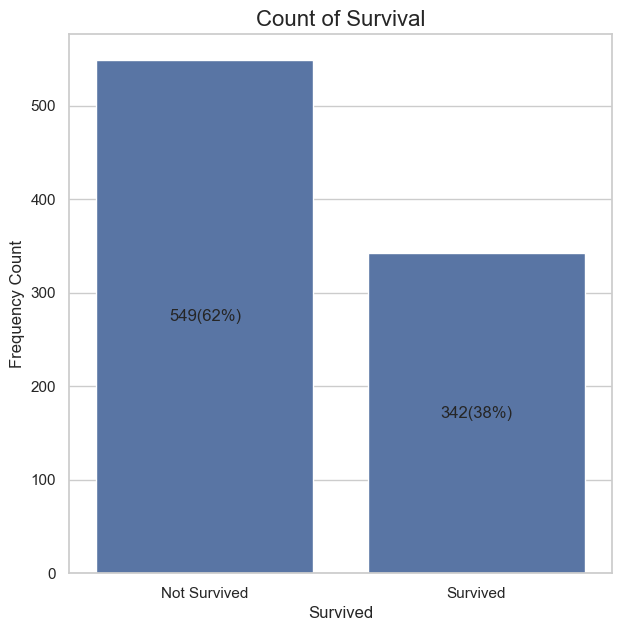

In [44]:
figure, survive_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= data["Survived"].value_counts().index, y = data["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Not Survived', 'Survived'])
survive_bar.set_ylabel('Frequency Count')
survive_bar.set_title('Count of Survival', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(data.Survived))+')',
               horizontalalignment='center', verticalalignment='center')

The survive_bar plot gives you the information that 62% of the passengers died.

#### **Embarked Count**

<Axes: xlabel='Embarked', ylabel='count'>

[Text(0, 0, 'Southampton'), Text(1, 0, 'Chernboug'), Text(2, 0, 'Queenstown')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Where did the passengers board the Titanic?')

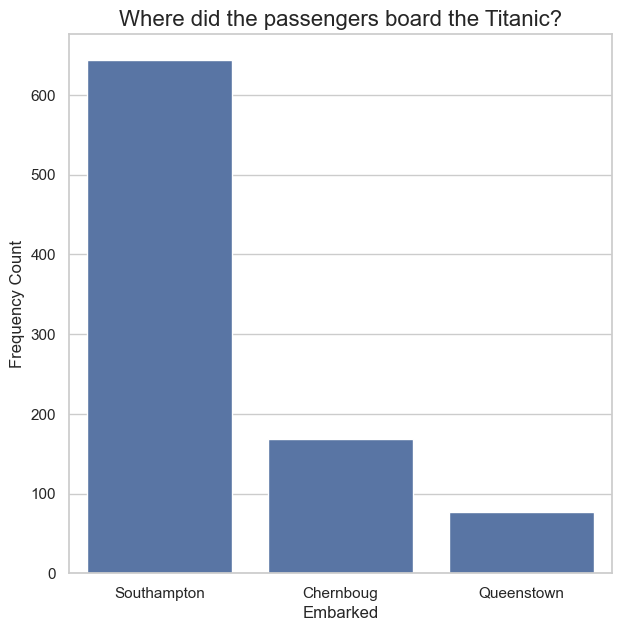

In [48]:
figure, embarked_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= data["Embarked"].value_counts().index, y = data["Embarked"].value_counts(), ax = embarked_bar)
embarked_bar.set_xticklabels(['Southampton', 'Chernboug', 'Queenstown'])
embarked_bar.set_ylabel('Frequency Count')
embarked_bar.set_title('Where did the passengers board the Titanic?', fontsize = 16)

Some interesting observations is that most of the passengers boarded from Southampton.

#### Counting Categorical Variables

The following plot is very helpful for visualizing categorical data:

1. We start by creating a grid for our plots, using subplots to organize multiple graphs on one canvas. We define the figure size as usual, and this time, we’ll create a 2x3 grid. This approach allows us to plot multiple charts in a structured format. If you need to create repetitive bar charts in a similar manner, you can simply loop through the grid and automate the process.

2. For instance, we want to plot frequency counts for several categorical variables from the Titanic dataset: `Survived`, `Pclass`, `Sex`, `SibSp`, `Parch`, and `Embarked`. The code below will help us do just that.

3. In the loop `for (u,v,z) in [["Survived",0,0], ["Pclass",0,1], ["Sex",0,2], ["SibSp",1,0], ["Parch",1,1], ["Embarked",1,2]]`, each element (u,v,z) represents a categorical variable and its corresponding position in the grid:
    - `u` corresponds to the variable name (e.g., `Survived`, `Pclass`, etc.),
    - `v` and `z` correspond to the row and column of the grid (e.g., `[0,0]`, `[0,1]`).

    The idea is that instead of hardcoding each barplot individually, you can loop through these variables and place each one in the correct position in the grid. Here’s how you might initially write it out manually:
    
    - `sns.barplot(x = train["Survived"].value_counts().index, y = train["Survived"].value_counts(), ax = myplot[0,0])`
    - `sns.barplot(x = train["Pclass"].value_counts().index, y = train["Pclass"].value_counts(), ax = myplot[0,1])`
    - `sns.barplot(x = train["Sex"].value_counts().index, y = train["Sex"].value_counts(), ax = myplot[0,2])`

    And so on.

    However, instead of repeating this manually for each variable, we loop through the variables (`Survived`, `Pclass`, etc.) and place each barplot in the appropriate spot on the grid. Since we’re using a 2x3 grid, the first graph will appear at `[0,0]`, the second at `[0,1]`, and so on.

4. The `for (u,v,z)` loop essentially simplifies this process, and while the list `[[..], [..], ...]` is hardcoded in this example, it’s a great way to start developing your programming logic.

5. I’ve also added some additional matplotlib code to ensure that all the graphs in the grid share the same visual features. The `adjust` function helps create space between the graphs to improve readability. I’m particular about making the visuals look nice, even though I’m still improving in that area.

<Axes: xlabel='Survived', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Survived Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Pclass', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Pclass Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Sex', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Sex Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='SibSp', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'SibSp Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Parch', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Parch Titanic')

Text(0, 0.5, 'Count')

<Axes: xlabel='Embarked', ylabel='count'>

Text(0.5, 0, '')

Text(0.5, 1.0, 'Embarked Titanic')

Text(0, 0.5, 'Count')

Text(0.0, 274.5, '549(62%)')

Text(1.0, 171.0, '342(38%)')

Text(0.0, 108.0, '216(24%)')

Text(1.0, 92.0, '184(21%)')

Text(2.0, 245.5, '491(55%)')

Text(0.0, 288.5, '577(65%)')

Text(1.0, 157.0, '314(35%)')

Text(0.0, 304.0, '608(68%)')

Text(1.0, 104.5, '209(23%)')

Text(2.0, 14.0, '28(3%)')

Text(3.0, 8.0, '16(2%)')

Text(4.0, 9.0, '18(2%)')

Text(5.0, 2.5, '5(1%)')

Text(6.0, 3.5, '7(1%)')

Text(0.0, 339.0, '678(76%)')

Text(1.0, 59.0, '118(13%)')

Text(2.0, 40.0, '80(9%)')

Text(3.0, 2.5, '5(1%)')

Text(4.0, 2.0, '4(0%)')

Text(5.0, 2.5, '5(1%)')

Text(6.0, 0.5, '1(0%)')

Text(0.0, 322.0, '644(72%)')

Text(1.0, 84.0, '168(19%)')

Text(2.0, 38.5, '77(9%)')

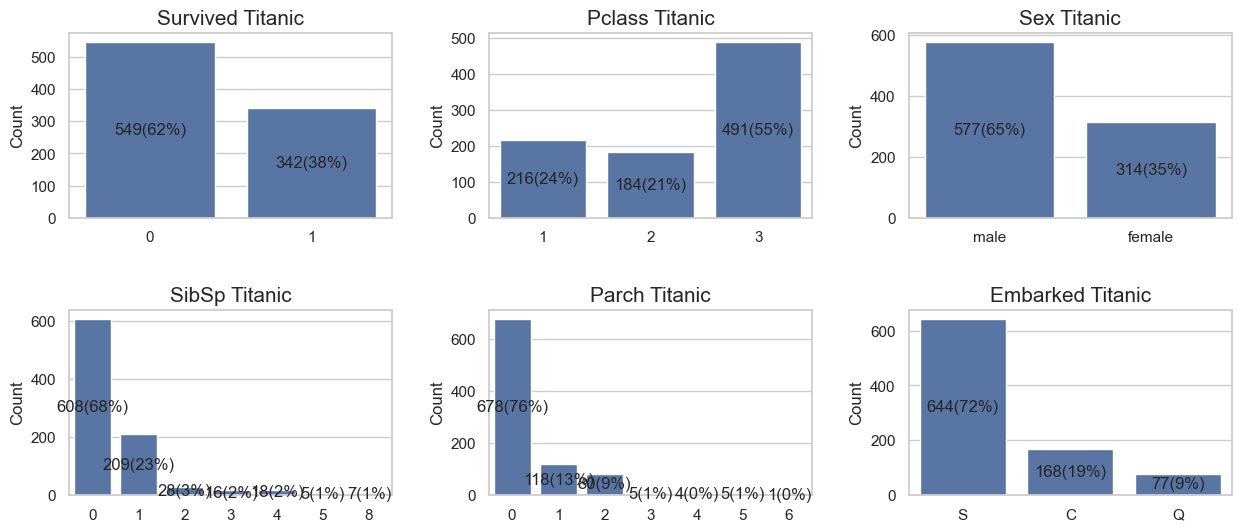

In [52]:
fig, myplot = plt.subplots(figsize = (15,6), nrows = 2,ncols = 3)

categorical_features = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

row, col, num_cols = 0,0,3

for u in categorical_features:
    sns.barplot(x = data[u].value_counts().index,y = data[u].value_counts(), ax  = myplot[row, col])
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u + " Titanic", fontsize = 15)
    myplot[row, col].set_ylabel("Count")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1


plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)
# i put roundbracket around x,y,z to make more sense. just like how x \in [1,2,3] and if x is a tuple or bracket
#we have   u \in [(1,2,3),(2,3,5),...] where u = (x,y,z)

#for each patch in each graph from [0,0] to [1,2], we want to do the following...
for v in range(2):
    for z in range(3):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
            label_y = patch.get_y() + patch.get_height()/2
            myplot[v,z].text(label_x, label_y,
                             str(int(patch.get_height())) + '('+'{:.0%}'.format(patch.get_height()/len(data.Survived))+')',
                            horizontalalignment='center', verticalalignment='center')


**Age Distribution**

Age is a variable that we can create bins for, but that will be another topic for another time. For now, let us look at the distribution and see what the distribution is. But be reminded, the distribution we are showing here is the training data set, whereby there are 177 missing ages supposedly. We **have not account for the missing values**. We call this plot **preimputation**. We will definitely come back to this plot later to compare when we have imputed the missing values of age.

<Axes: xlabel='Age', ylabel='Density'>

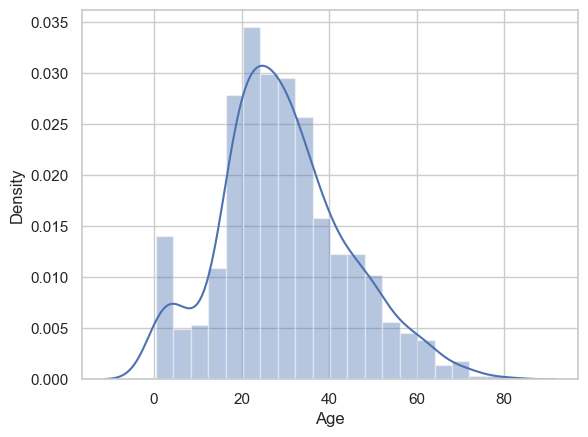

In [54]:
null_ages = pd.isnull(data.Age)
known_ages = pd.notnull(data.Age)
preimputation = data.Age[known_ages]
sns.distplot(preimputation)
#here we show a distribution of ages before imputation.

<Axes: xlabel='Age', ylabel='Density'>

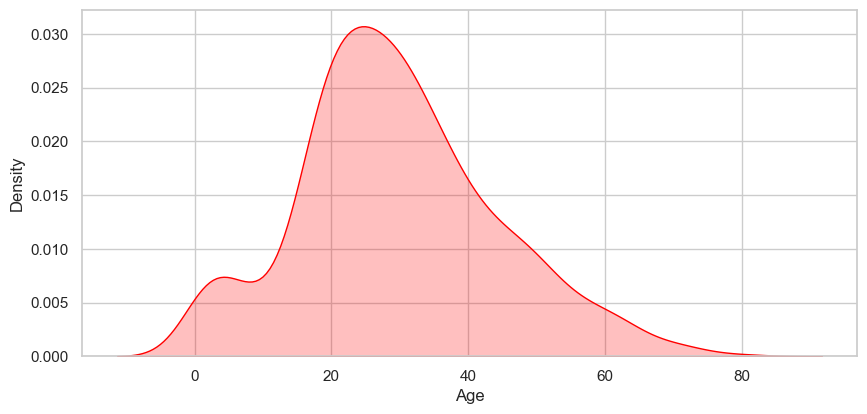

In [56]:
# Explore Age distibution as a whole
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=data["Age"], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

### 3.2) Plot variables against Survived  <a id="survive"></a>

Note that one should see that Name, Ticket, PassengerID will not play any crucial role in predicting the survival rate.
Hence I do not want to analyse them, later I will drop them. However, after reviewing many kernels by other experienced data analysts, we can do some feature engineering with Name - We will mention it later. We will do some basic overview of the survival rate in different categories.

In [59]:
def print_percentage(df,col_name,col_values):
    for x in col_values:
        group = df.loc[df[col_name]==x]
        print ('{0} survival rate: {1:.3f}'.format(x, (group['Survived'].sum()/group.shape[0])))

### 3.2.1) Plot Gender against Survived  <a name="gender"></a>

In [63]:
print_percentage(data,'Sex',["male","female"])

male survival rate: 0.189
female survival rate: 0.742


The code below is useful to understand if you want to plot a barplot using Seaborn package, you should compare and contrast that different seaborn plots use different coding methods.

1. As usual we specify the plot size in the first line and name our axis myaxis.


2. This is sns.barplot, so we look at the parameters inside.


3. First we use our data = train and extract x = Sex column and y = Survived column. Next the underlying idea is to group the data by sex, so there are male and female. Then in each category of male and female, there are the survived or not by the "Survived column" represented by 0 and 1. Our estimator = np.mean = function mean and that means, for each category male and female, calculate their MEAN survived; for example there are 2 male with 0,1 and 3 females with 1,0,1, and by applying the estimator mean we have (0+1)/2 = 0.5 and (1+0+1)/3 = 2/3 which means 50% of the males survived and 66.6% of the females survived. In this case we got lucky cause survive column is only 0 and 1 ; In which case the mean of the survival rate of male and female is literally just the proportion of male, female who survived the titanic.

    If I tweak the example just now to some other number like let survive = 2 and not survived = 3 then we will have (2+3)/2 = 2.5 and (3+2+3)/3 = 2.66 and those become 250% and 266% which are not meaningful. So do be careful.
    

4. It is fairly obvious that female has a much higher survival chance than men.


5. The second count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females 233 survived and 314-233 = 81 did not survive. While among male passengers 109 survived and 577-109 = 468 did not survive. Also, male survival rate is only 18.9 percent while female survival rate is 74.2 percent. This indicates quite a correlation between gender and survival rate.

<Axes: xlabel='Sex', ylabel='Survived'>

Text(0.5, 1.0, 'Survived/Non-Survived Passenger Gender Distribution')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Proportion of passengers survived')

Text(0.0, 0.09445407279029462, '18.891%')

Text(1.0, 0.37101910828025475, '74.204%')

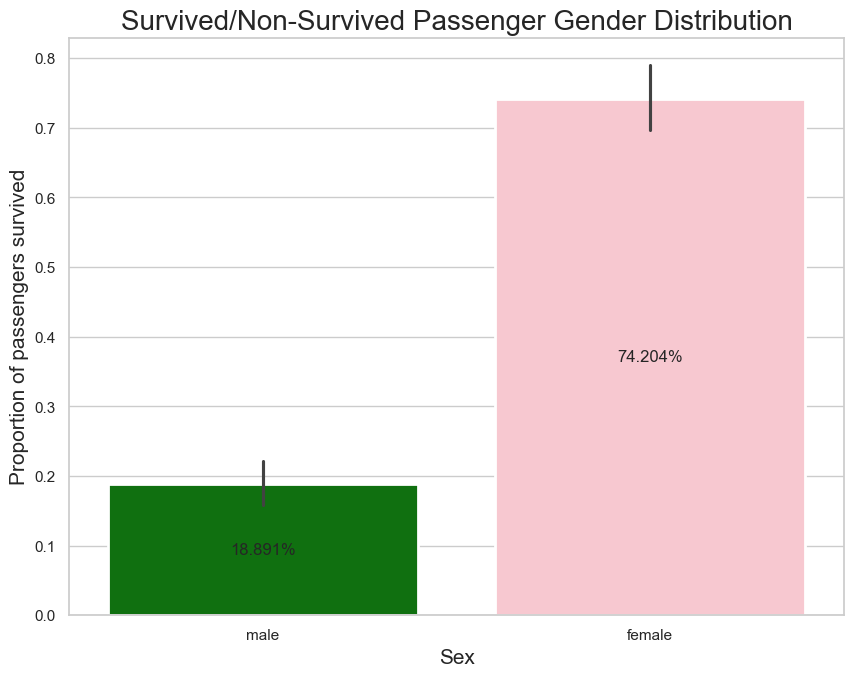

In [66]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))


sns.barplot(x = "Sex",
            y = "Survived",
            data=data,
            ax = myaxis,
            estimator = np.mean,
            palette = {'male':"green", 'female':"Pink"},
            linewidth=2)

myaxis.set_title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 20)
myaxis.set_xlabel("Sex",fontsize = 15)
myaxis.set_ylabel("Proportion of passengers survived", fontsize = 15)

for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

<Axes: xlabel='Sex', ylabel='count'>

Text(0.5, 1.0, 'Passenger Gender Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Number of Passenger Survived')

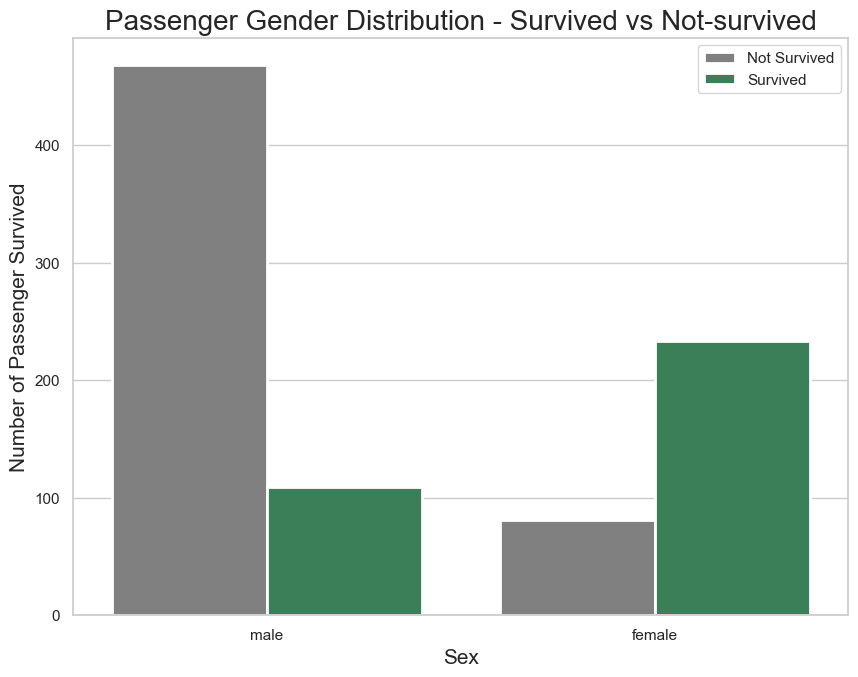

In [68]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Sex",
                   hue="Survived",
                   data = data,
                   linewidth=2,
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Sex", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

At this step, we can actually build a **baseline model** such that we predict all women survived and all men died. Or we can predict that every time we encounter a unseen data, we predict 74% of the women survived and 18 of the men died. In both cases, we are just using the 2 hypothesized model as baselines - any other models must perform better than this. Note that if you read the Titanic overview, they gave you a excel file where the output is predicted just by assuming all women survived.

<br>

Also, we retrospectively knew that women and child are prioritized to board the safety boat back then and thus explains the reason that female has such a high survival rate. In reality, if we are given a real world problem, it is our job to establish some plausible explanation that female has a much more significant survival rate than men - and that needs further digging.


### 3.3.2) Plot Pclass against Survived  <a id="pclass"></a>

**https://seaborn.pydata.org/generated/seaborn.pointplot.html**

In [72]:
print_percentage(data,'Pclass',[1,2,3])

1 survival rate: 0.630
2 survival rate: 0.473
3 survival rate: 0.242


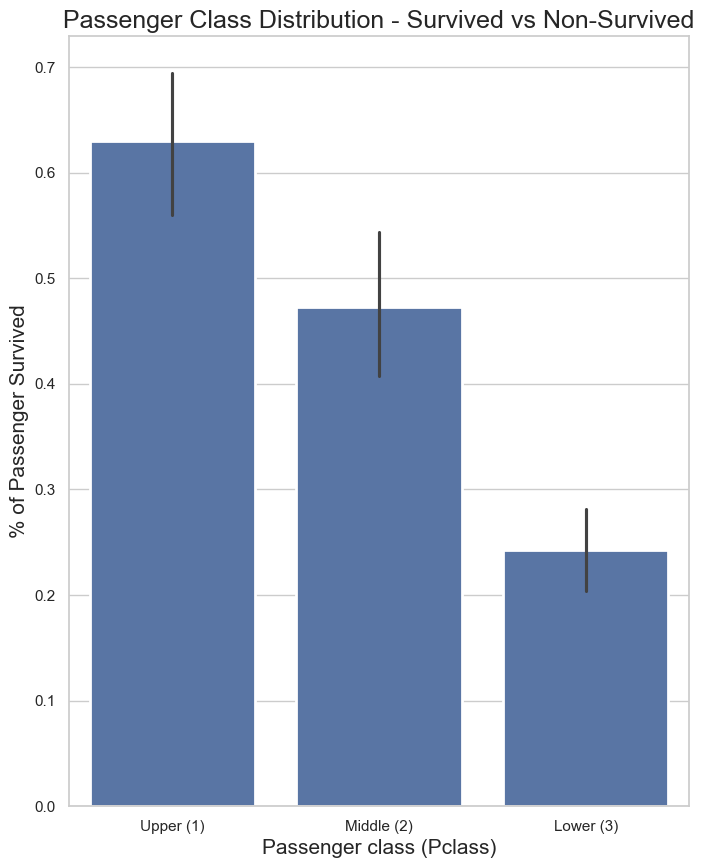

In [74]:
#Plot 1: We can use a bar plot:

figure, pclass_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Pclass",
            y = "Survived",
            estimator = np.mean,
            data=data,
            ax = pclass_bar,
            linewidth=2)
pclass_bar.set_title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 18)
pclass_bar.set_xlabel("Passenger class (Pclass)", fontsize = 15);
pclass_bar.set_ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper (1)', 'Middle (2)', 'Lower (3)']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right.
pclass_bar.set_xticklabels(labels);




### 3.2.3) Plot Embarked against Survived  <a id="embarked"></a>

Now we do an EDA on Embarked vs Survival Rate.

In [77]:
print_percentage(data,'Embarked',['S','C','Q'])

S survival rate: 0.337
C survival rate: 0.554
Q survival rate: 0.390


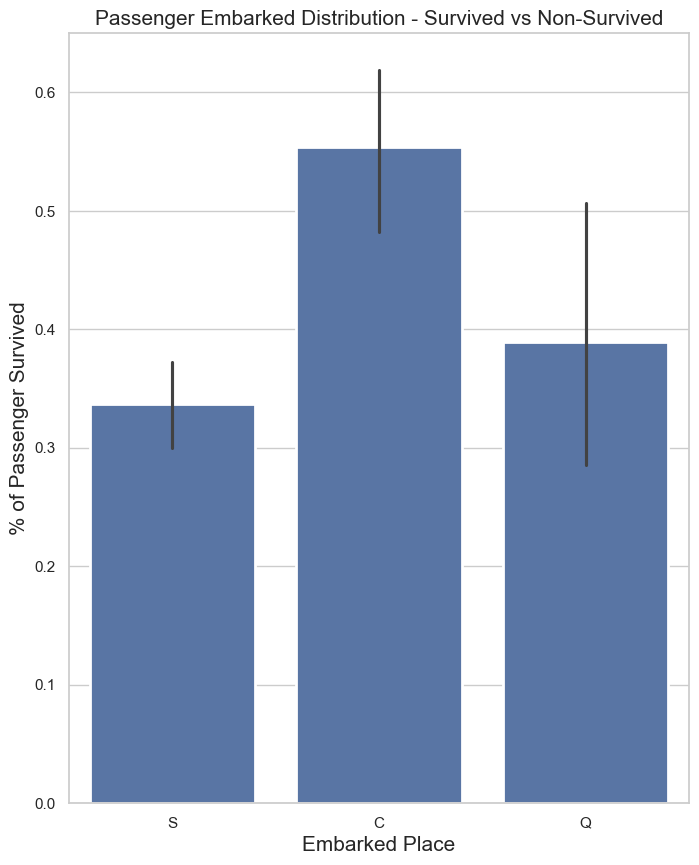

In [79]:
figure, embarked_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked",
            y = "Survived",
            estimator = np.mean,
            data=data,
            ax = embarked_bar,
            linewidth=2)
embarked_bar.set_title("Passenger Embarked Distribution - Survived vs Non-Survived", fontsize = 15)
embarked_bar.set_xlabel("Embarked Place", fontsize = 15);
embarked_bar.set_ylabel("% of Passenger Survived", fontsize = 15);



The above 2 plots showed that passengers boarding from Cherbourg (C) has a better chance of survival. However, one should always question what a graph gives you; In this case, it is not **immediately obvious** why a boarding place has anything to do with one's **survival rate**. A statistical visualization can only bring you this far, it is now your turn to dig out why. (Of course, it may be entirely random that the survivors embarked from Cherbourg).

<br>

**Hypothesis:** As far as our analysis went, it is reasonable to assume that female has a better survival rate than male. Also we have reasonable evidence to think that people with higher Pclass have a higher survival rate. So maybe Cherbourg is a **"better"** city than the other 2 such that most passengers boarding from Cherbourg has a higher Pclass than the rest of the city. Or it could be that Cherbourg has a higher Female:Male ratio and thus most people that embarked from Cherbourg are females? We shall test our hypothesis out.

<br>



**Pclass vs Embarked**


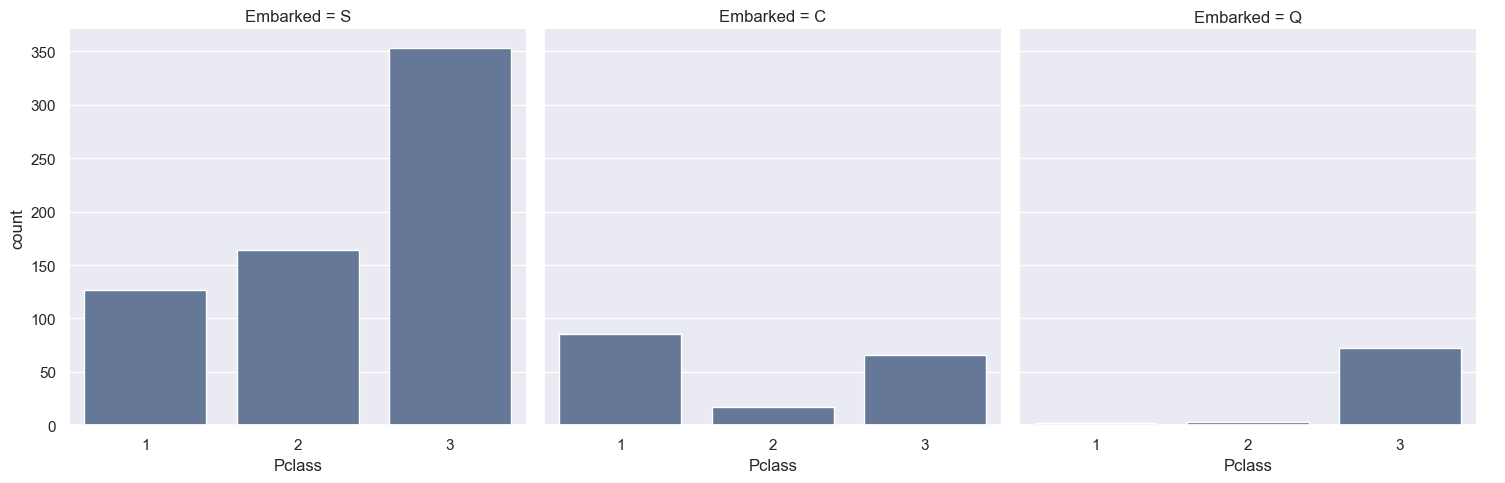

In [83]:
sns.set(font_scale=1)
g = sns.catplot(x="Pclass", col="Embarked",
                    data=data, saturation=.5,
                    kind="count", ci=None)

Indeed, Passengers embarked from Chersboug has a high **proportion** of Pclass 1. This may account for one of the reasons that passengers who boarded from Chersboug has a significantly higher suvival rate than the rest of the cities.

**Gender vs Embarked**

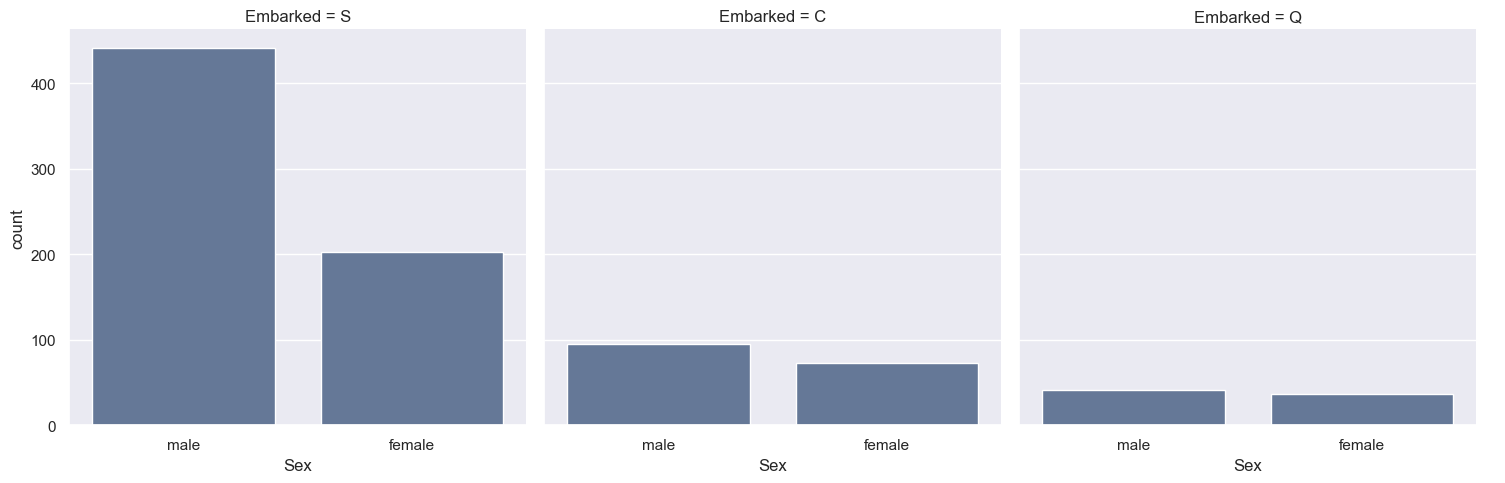

In [87]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", col="Embarked",
                    data=data, saturation=.5,
                    kind="count", ci=None)

Although this plot did not tell us anything informative on whether females play a role in why Chersboug has a higher survival rate, it did hint to us that why Southampton has the lowest survival rate. A good reason is that there is way more males embarked from Southampton than females.

### 3.2.4) Plot Age against Survived  <a id="age"></a>

Now we do an EDA on Age vs Survival Rate. Age is a continuous variable, and we should not use bar chart here. I present one of the way to plot a KDE distribution below, where you superimpose the age plot for survived and the age plot for not survived. The idea of the code is you first plot the age plot for not survived, and then you plot the age plot for survived on the same axis: ax = myaxis, then the graph will present both graphs on the same grid.  

<Axes: xlabel='Age', ylabel='Density'>

<Axes: xlabel='Age', ylabel='Density'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

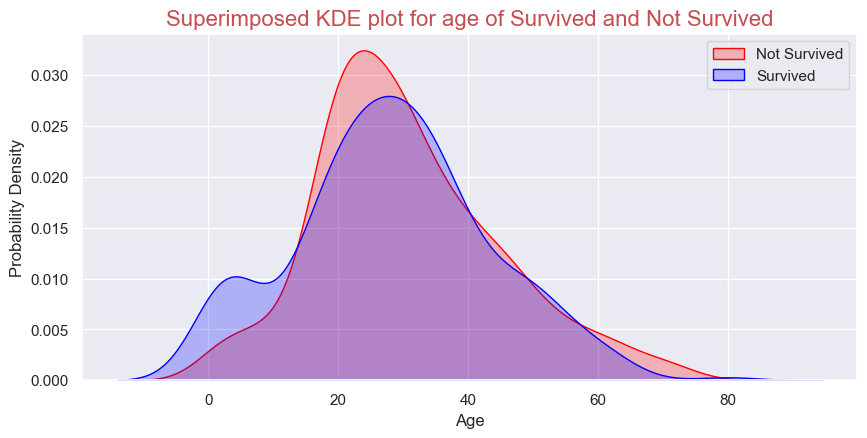

In [91]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=data["Age"][(data["Survived"] == 0) & (
    data["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')

sns.kdeplot(data=data["Age"][(data["Survived"] == 1) & (
    data["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

The above plot shows the age vs survival rate, represented by a density plot; for survivors and non survivors, the distribution seems to be similar. However, for survivors we see an obvious local maximum at around 0-5 years old, indicating small children has a higher survival rate. **Reminder: This distribution is before filling in the missing values of age.**

Below are some more visualizations graphs.

Text(0.5, 0.98, 'Survived by Sex and Age')

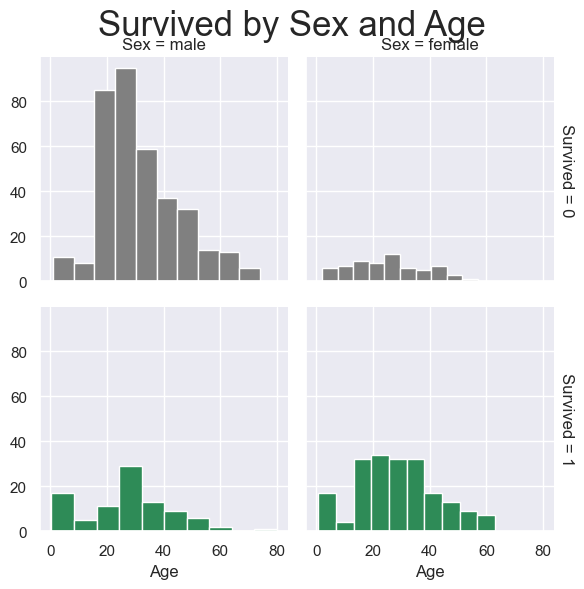

In [94]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(data, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Text(0.5, 0.98, 'Survived by Sex and Age')

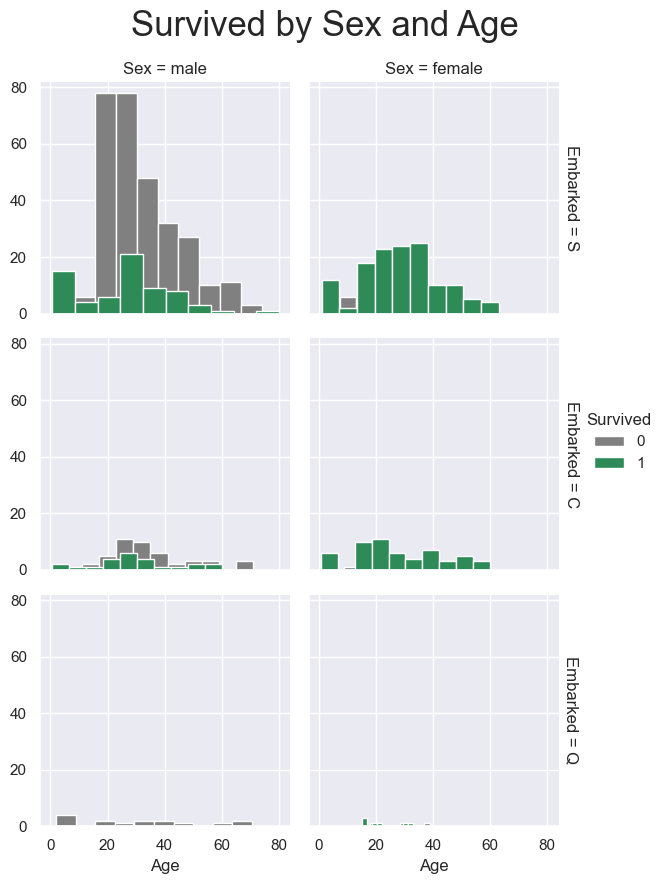

In [95]:
g = sns.FacetGrid(data, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

<Axes: xlabel='Age', ylabel='Density'>

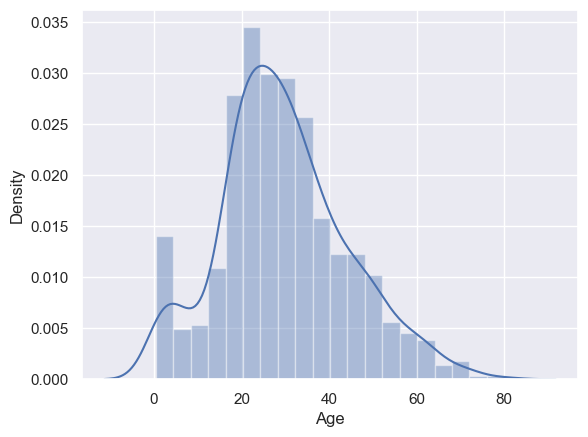

In [97]:
null_ages = pd.isnull(data.Age)
known_ages = pd.notnull(data.Age)
preimputation = data.Age[known_ages]
sns.distplot(preimputation)

### 3.2.5) Plot Fare against Survived  <a id="fare"></a>


Fare is a continuous variable, so it is good to plot a histogram or a KDE to see the distribution.

<Axes: xlabel='Fare', ylabel='Density'>

<Axes: xlabel='Fare', ylabel='Density'>

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for Fare of Survived and Not Survived')

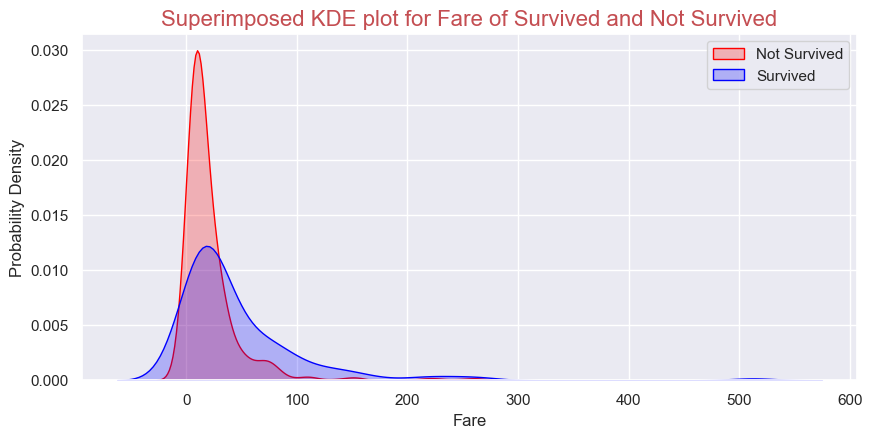

In [102]:
# Explore Age distibution
figure, fare = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=data.loc[(data['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)

sns.kdeplot(data=data.loc[(data['Survived'] == 1),'Fare'], kernel='gau', ax=fare, color="Blue", shade=True, legend=True)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed KDE plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

<Axes: xlabel='Fare', ylabel='Density'>

<Axes: xlabel='Fare', ylabel='Density'>

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed distribution plot for Fare of Survived and Not Survived')

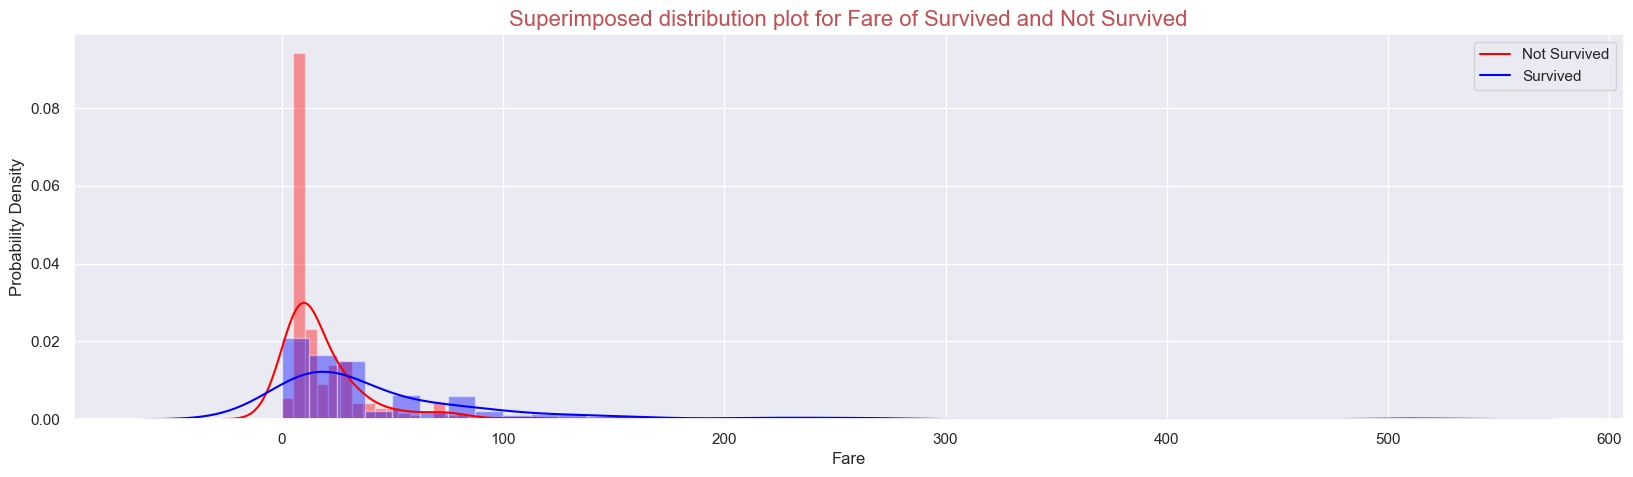

In [103]:
figure, fare = plt.subplots(figsize=(20, 5))
sns.distplot(data.loc[(data['Survived'] == 0),'Fare'], hist=True, color='red', ax=fare)
sns.distplot(data.loc[(data['Survived'] == 1),'Fare'], hist=True, color='blue', ax=fare)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed distribution plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

After a brief look at the distribution of both the age and fare plots, we do realise that the graph is not **smooth**, we can say that the graph has splitting and spiking points. In which it may be suggesting to us that if we were to apply a tree algorithm later, these 2 features will play a significant importance (henceforth we shall include them). See! EDA is useful! It gives us an intuition of what algorithms to use even before we start. Credits to https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic - a wonderfully tailored kernel for beginners.

### 3.2.6) Plot Parch, SibSp against Survived  <a id="fare"></a>

In [108]:
data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Notice that for Parch, people travelling with 3,4,5,6 parents/children aboard are very little. And thus, the barplot representing their survival percentage may cloud your judgement. As can be seen below, there is 0% of people who survived with 6 Parch, but this is because there is only literally 1 person who travelled on board with 6 parents/children; and 1 person is too small a sample size to conclude anything useful. 

In [111]:
print_percentage(data,'Parch',[0,1,2,3,4,5,6])

0 survival rate: 0.344
1 survival rate: 0.551
2 survival rate: 0.500
3 survival rate: 0.600
4 survival rate: 0.000
5 survival rate: 0.200
6 survival rate: 0.000


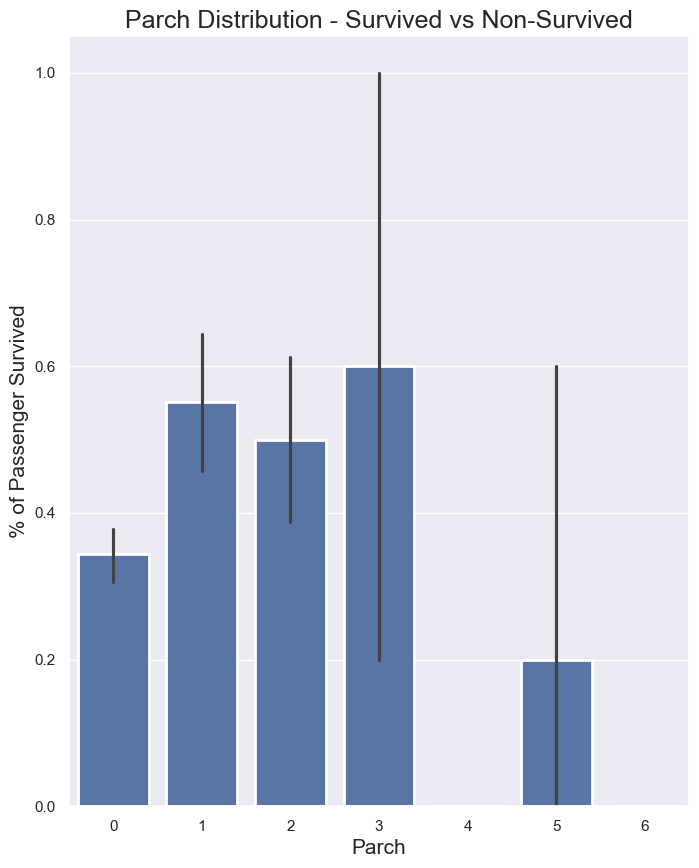

In [113]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Parch",
            y = "Survived",
            estimator = np.mean,
            data=data,
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Parch Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("Parch", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

<Axes: xlabel='Parch', ylabel='count'>

Text(0.5, 1.0, 'Passenger Parch Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Parch')

Text(0, 0.5, 'Number of Passenger Survived')

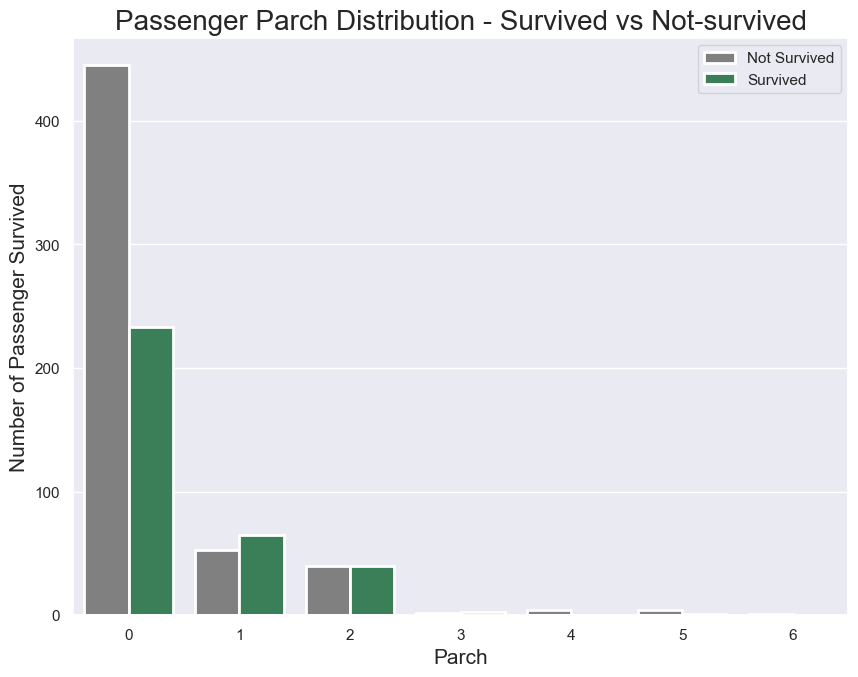

In [115]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Parch",
                   hue="Survived",
                   data = data,
                   linewidth=2,
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Parch Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Parch", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [117]:
data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [119]:
print_percentage(data,'SibSp',[0,1,2,3,4,5,8])

0 survival rate: 0.345
1 survival rate: 0.536
2 survival rate: 0.464
3 survival rate: 0.250
4 survival rate: 0.167
5 survival rate: 0.000
8 survival rate: 0.000


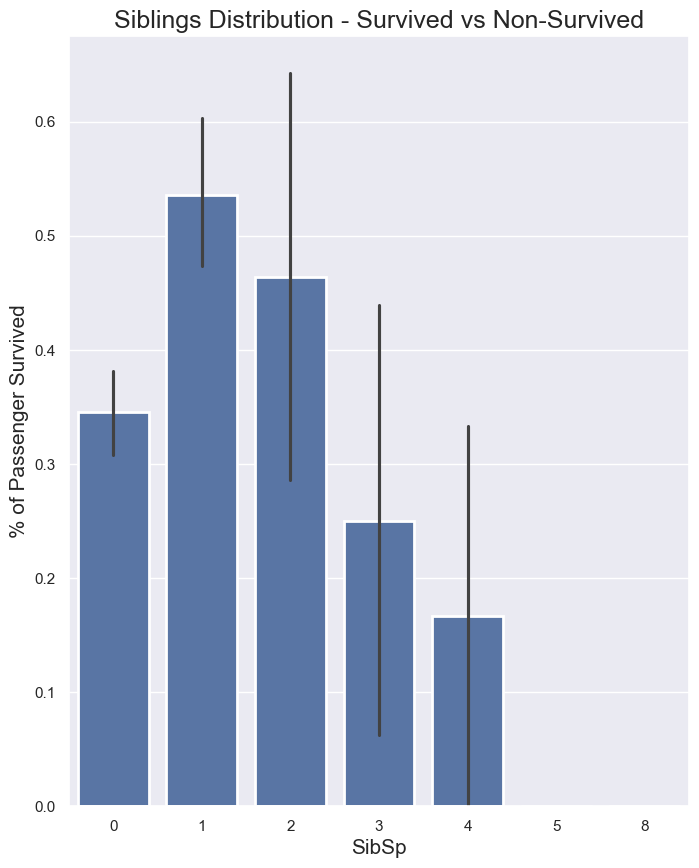

In [121]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "SibSp",
            y = "Survived",
            estimator = np.mean,
            data=data,
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Siblings Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("SibSp", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

<Axes: xlabel='SibSp', ylabel='count'>

Text(0.5, 1.0, 'Siblings Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Siblings')

Text(0, 0.5, 'Number of Passenger Survived')

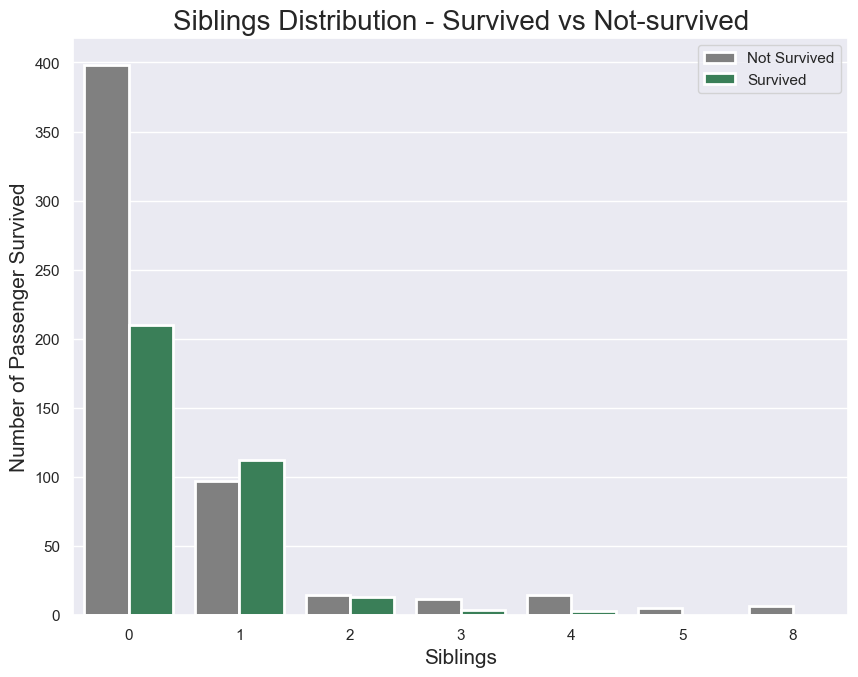

In [123]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "SibSp",
                   hue="Survived",
                   data = data,
                   linewidth=2,
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Siblings Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Siblings", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

One thing is for sure when I read the above few graphs, that is passengers who travelled alone seems to have a lower survival rate than the others.

**Conclusion of EDA**

Continuous Features: There are 2 continuous features Age and Fare, where we see that split points and spikes are present in the graph, unfortunately, there are only 2 of them so we cannot drop them or alter too much. They can be captured easily with a decision tree algorithm, but neural networks may not be able to spot them. (source: https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic One has to be experienced to do something like his).

<br>

Categorical Features: As we can see, most of the categorical feature has classes that indicates significant survival/non-survival rate. This is a tell tale sign that one-hot encoding may be quite useful here. But also, this project has little categorical variables, and thus one hot encoding usage is not put down by the possible "curse of dimension".

## 4) **Feature Engineering/Selection** <a id="eng"></a>

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

**"Garbage into Machine Learning Algorithm, Garbage out of the Algorithm!"**

<br>

Machine Learning Algorithm is only as smart as it's owner can get. As the owners of the algorithms, we need to choose carefully what features (inputs) we feed into the algorithm. If we decide to feed in some irrelevant or "noisy" features, then our algorithm may malfunction and produce bad results.

<br>

For example, in our titanic dataset, we see passengerID column and decide to feed in blindly, the machine may really think there is an underlying pattern among the passengerIDs and train the algorithm to adapt to the "non-existence pattern". This may cause overfitting, and when we apply our algorithm to a new unseen data with passengerIDs (possibly with different passengerIDs), then our algorithm will perform badly!

<br>

Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. I think feature engineering efforts mainly have two goals:

a) Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

b) Improving the performance of machine learning models.

<br>

Here we will introduce a few feature engineering techniques, but may or may not go through all as this kernel is update in progress.



### 4.1) Imputation <a id="imp"></a>

It is extremely annoying when your data sets have missing values. It is not wise to just delete them, or blindly replace them with the median/mean/mode. (Without knowing why the data is missing in the first place, we are unable to come up with a foolproof method for imputing the missing data). One could check some of the links here for further reading.

- [columbia stats notes](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)

- [data imputation using regression](https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression/notebook)

- [regression imputation stochastic vs deterministic](https://statisticsglobe.com/regression-imputation-stochastic-vs-deterministic/)

- [statistical modelling for imputation and outliers](https://www.kaggle.com/caicell/statistical-modeling-imputation-outliers/notebook#3.-Imputation-and-Outliers)

---

And today we are going to talk about a few ways of handling missing data, however, there are a lot of methods, and we shall not be greedy and attempt to understand all in one single session.

Also, bear in mind that filling in missing values may not just necessary mean filling in values that are not present. We should however be aware that certain data entries automatically convert NA/NAN values to 0. Therefore, even if you use `df.isnull()` to check and found that **there are no missing values**, that does not mean imputation is not needed. So a good habit is also to check if the numbers make sense or not. For example, if we are modelling the height of New York people and there are many people with height 0 cm, then it does not even make sense to begin with (although if you use `isnull` it will not show), so sometimes you have to be sharp and spot outlier values, and either remove them or impute them.

**Some users said that it is convenient to work on concatenated training and test set while dealing with missing values, otherwise the filled data may overfit to separate training or test sets. I welcome people to discuss in the comments section on this. However, note for the parts below, I will not use the concatenated set to impute missing values.**

The amount of missing values in Age, Embarked and Fare features are relatively smaller compared to the total samples, but roughly 80% of the Cabin feature is missing. Missing values in Age, Embarked and Fare features can be filled with descriptive statistical measures, but that wouldn't work for Cabin feature.




### Good Advice

I had a good read from volhaleusha's kernel regarding on imputation: https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8. The following long wall of text is extracted from various sources/kernels.

<br>

In the dataset `Age, Embarked, Fare and Cabin` features have missing values.  

There are multiple ways to deal with missing values in dataset and chosen strategy highly depends on type feature type, amount of missing values, size of dataset and etc.  


**Missing - Data Mechanism**

To decide how to handle missing data, it is helpful to know why they are missing. We consider four general “missingness mechanisms,” moving from the simplest to the most general.

<br>

**Suppose you are modelling weight (Y) as a function of sex (X). Some respondents wouldn't disclose their weight, so you are missing some values for Y. There are three possible mechanisms for the nondisclosure:**

1. **Missingness Completely At Random ( MCAR):** Missing completely at random (MCAR) is the only missing data mechanism that can actually be verified. When we say data are missing completely at random, we mean that the missingness has nothing to do with the person being studied. For example, a questionnaire might be lost in the post, or a blood sample might be damaged in the lab. Of course, this is not **completely random**, but the underlying idea is the missing data is not related to the subject of the missing data. [reference](https://cpb-us-w2.wpmucdn.com/blog.nus.edu.sg/dist/4/6502/files/2018/06/mcartest-zlxtj7.pdf)

   There may be no particular reason at all why some respondents told you their weights and others didn't. That is, the probability that Y is missing may has no relationship to X or Y. In this case our data is missing completely at random (MCAR).

<br>


2. **Missing At Random (MAR):** Missing at random (MAR) means that the missingness can be explained by variables on which you have full information. It's not a testable assumption, but there are cases where it is reasonable vs. not.

   For example, take political opinion polls. Many people refuse to answer. If you assume that the reasons people refuse to answer are entirely based on demographics, and if you have those demographics on each person, then the data is MAR. It is known that some of the reasons why people refuse to answer can be based on demographics (for instance, people at both low and high incomes are less likely to answer than those in the middle), but there's really no way to know if that is the full explanation.

   So, the question becomes "is it full enough?". Often, methods like multiple imputation work better than other methods as long as the data isn't very missing not at random. [reference](https://stats.stackexchange.com/questions/23090/distinguishing-missing-at-random-mar-from-missing-completely-at-random-mcar)

   One sex may be less likely to disclose its weight. That is, the probability that Y is missing depends only on the value of X. Such data are missing at random (MAR).

<br>

3. **Missing Not At Random (MNAR):** Heavy (or light) people may be less likely to disclose their weight. That is, the probability that Y is missing depends on the unobserved value of Y itself. Such data are not missing at random or missing not at random (MNAR) and requires attention or else it will heavily bias your inference.






<br>

**Possible solutions to deal with missing values in Continuous Variables (Refer to https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8#Part-4:-Explore-Target-Variable):**

1. Complete Case Analysis CCA (discard observations where any value is missing in any variable) - doesn't work if there are many features missing or on small datasets.
    <br>
    
2. Mean and median imputation (substitute missing values with mean feature value (for Gaussian features) and median (if a variable is not Gaussian)
    - normally good strategy if data is missing completely at random
    - but if there is a dependency between why data is missing and target it is better to additionally create a separate variable to capture NAs
    - changes the original distribution of variable and can distort covariance with other variables $\to$ if too much can influence prediction in a negative way
    
      <br>
      
3. Random sampling imputation (to fill NAs - take a random observation from available observation)
    - preserves the original distribution of data, but can create randomness - treatment of the same sample differently or unfair
    
      <br>
      
4. Adding a separate variable to capture NAs
    - useful in situations when data is not missing at random and there is some connection on why data is missing with a target or other variables
    - expands feature space as creates an additional feature
    
      <br>
      
5. End of distribution imputation (replace NAs with values that are at the far end of the distribution)
    - shows the importance of missingness
    - but if missingness is not important can mask predictive power and distorts the original distribution
    
      <br>
      
6. Arbitrary value imputation (substitute with value away from other values in the variable -999, 999)
    - captures the importance of missing value
    - but creates outlier (it doesn't matter for trees)
    
      <br>
      
7. Build a model to impute missing values: KNN, linear regression, etc.
    - a very good estimate of missing data
    - but it can be a problem because prediction usually is too good and doesn't match reality

<br>

**Possible solutions to deal with missing values in categorical variables:**
1. CCA
    - for pros and cons refer above
2. Random sample imputation
3. Adding a separate variable to capture NAs
4. Adding a separate category to capture NAs



<br>

1. If the data is MCAR:

   i) Complete case analysis is valid.

   ii) Mulitple imputation or any other imputation method is valid.
    
<br>

2. If the data is MAR:

   i) Some complete cases analyses are valid under weaker assumptions than MCAR. E.g. linear regression is unbiased if missingness is independent of the response, conditional on the predictors.

   ii) Multiple imputation is valid (it is biased, but the bias is negligible).
    
<br>

3. If the data is MNAR:

   i) You must model the missingness explicitly; jointly modeling the response and missingness.

   ii) In some specific cases (e.g. survival analysis), MNAR data (e.g. censored data) is handled appropriately.

   iii) Generally, we assume MAR whenever possible just to avoid this situation.








<br>

More good links to refer to:   
1. [Missing-data imputation](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)
2. [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

<br>


### 4.1.1) Missing Values: Fare <a id="fare"></a>

We first check the number of missing values for fare.

In [132]:
# Check variable Fare for missing values:
print('Amount of missing data in Fare for training set:', data.Fare.isnull().sum())


Amount of missing data in Fare for training set: 0


Since the missing data is so little, it is therefore easy and feasible to check which passenger has a missing fare value. And a common way to impute missing data when the missing amount of data is small is presented as below.

### 4.1.2) Missing Values: Embarked <a id="emb"></a>

In [136]:
# Check variable Embarked for missing values:
print('Amount of missing data in Embarked for train:', data.Embarked.isnull().sum())


Amount of missing data in Embarked for train: 2


In [138]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked is a category variable. It is not easy to find its correlation with other variables. So we turn our attention to the EDA we have done earlier in section 3.2.3. If you allow me to make an educated guess, I would say embarked may be most related with Pclass and Fare - the logic lies in assuming that certain cities are "richer" than other cities - and hence a reasonable assumption is that the passengers who come from the "richer" cities should also be of higher class and fare.

We can see from our EDA that Southampton has the most Pclass 1 passengers and I would just imputate the embarked by S.

In [141]:
# pclass1_fare = train[train.Pclass == 1].sort_values(['Embarked','Fare'])
# g = sns.FacetGrid(pclass1_fare,col = "Embarked")
# g.map(sns.distplot, "Fare", kde = False)

In [143]:
data['Embarked'] = data['Embarked'].fillna('S')

### 4.1.3) Missing Values: Age <a id="age"></a>

In [146]:
# Check variable Embarked for missing values:
print('Amount of missing data in Age for train:', data.Age.isnull().sum())


Amount of missing data in Age for train: 177


**Fill in missing values for Age.**

**Age has quite a lot of missing values**. So when there are a lot of missing values, we should choose the imputation strategy carefully.<br>

In order to understand which missing value imputation strategy to choose, we need to need to answer some questions about variable Age:

<br>

1. Are values in variabe Age missing at random? - if not, it is useful to have feature to capture information in which rows Age is missing.

<br>

2. We will choose 2 different strategies to capture missing values and compare model performance for them: mean/median imputation and build models to impute missing values. This 2 strategies are very different from each other:
    - Mean/median imputation is easy and works well, however it distorts original variance of variable and covarience of variable with other features
    - Building a model to predict values is normally a very good estimate of missing values, however, it tends to give too perfect values for real situation. It results in unrealistic prediction due to standard error is deflation.
    
    
<br>

Also I will create copy versions of train data set because I want to compare and contrast the different methods using median imputation in the second part.

Some of the below age imputation Code was taken and modified from https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic. Please check his kernel out, a concise one with neat lines of codes! Impressive.
    

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

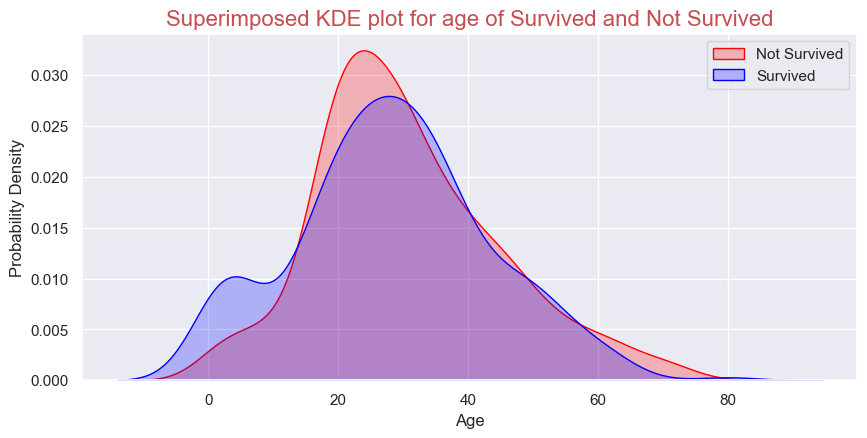

In [149]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

preimputation=sns.kdeplot(data=data["Age"][(data["Survived"] == 0) & (
    data["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')

preimputation=sns.kdeplot(data=data["Age"][(data["Survived"] == 1) & (
    data["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

### 4.2) Outliers <a id="out"></a>

It is important to know outliers. Outliers are very important because they affect the mean and median which in turn affects the error (absolute and mean) in any data set. When you plot the error you might get big deviations if outliers are in the data set. Also do bear in mind that we can always do outliers pre- and after missing values imputation.

<br>

**Also, DO NOT just drop or replace the outlier with the mean/(or what not) JUST because the algorithm or the box and whisker plot says SO! Think before you act! Sometimes we have to make sense of the data - ask yourself first, are the outliers justifiable?? Why did the outliers exist? Do we need them in order to make the model more accurate?**

- If one is sure outliers are caused by incorrect entry or human errors. One can DROP the outlier.

<br>

- More commonly, the outlier affects both results and assumptions.  In this situation, it is not legitimate to simply drop the outlier.  You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed.

<br>

- If the outlier creates a significant association, you should drop the outlier and should not report any significance from your analysis.

<br>

**In general, one can always be careful and analyse the model with and without the outliers. Justify why you want to remove them, or replace them.**




Also, Please draw box and whisker plot and normal probability plots as the visuals will give you a good understanding of the outliers.

Lastly, a repeated reminder is to check outliers before data imputation.

<br>

Here we use Tukey's method for detecting outliers:

**Definition of Tukey's Fences**

If $Q_1$ and $Q_2$ are the lower and upper quartile respectively, the one could define an outlier to be any observation outside the range of $$\left[Q_1-k(Q_3-Q_1), Q_3+k(Q_3-Q_1)\right]$$

for some non-negative k, and John Tukey proposes this k should be 1.5.



In the following chunk of code, I will use a code from a very experienced fellow Kaggler: But on top of that, since I mentioned that coding is an integral part of data science, and I am not experienced with coding, I will make an attempt to break the code into easy chunks to understand - experienced coders can skip the explanation.
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

In [153]:
from collections import Counter

def detect_outliers(df, n, features):
    outliers_indices = [] #create a empty list to keep track of the passenger row number.
    for col in features:
        # 1st quartile (25%)
        Q1 = np.nanpercentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.nanpercentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)
                              | (df[col] > Q3 + outlier_step)].index

        #print(df[(df[col] < Q1 - outlier_step)
                              #| (df[col] > Q3 + outlier_step)].index)
        print(col,Q1-outlier_step,Q3+outlier_step)
        # append the found outlier indices for col to the list of outlier indices
        outliers_indices.extend(outlier_list_col)

    #print(outliers_indices)

    # select observations containing more than 2 outliers
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(k for k, v in outliers_indices.items() if v > n)
    #print(outliers_indices)

    return multiple_outliers


Outliers_to_drop = detect_outliers(data, 2, ["Age", "SibSp", "Parch", "Fare"])


Age -6.6875 64.8125
SibSp -1.5 2.5
Parch 0.0 0.0
Fare -26.724 65.6344


**Explanation for the code above, going line by line**

1. def detect_outliers(df, n, features) is defining a function named detect_outliers which takes in a dataset df (train), and a certain number of featured columns called features and n is the threshold. For example, if we have detect_outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"]), it means that we are looking at the data set called train and the columns involved are age, sibsp, parch and fare. However, if there is this guy called John and his age is 100, he definitely will be flagged out as an outlier , but is it fair to just consider John as an outlier just because he is old? So the author of the kernel that I linked earlier defines an outlier iff the person has more than 2 outliers at any one time. For instance, we only consider John as an outlier if he has n>2 outliers on him at the same time. For we find that John has age 100 and sibsp = 30  and fare as 1000000, and we have find out that these values of John are all outliers in its own right, then John has > n =2 columns as outliers, so then only can we consider john as an outlier.
<br>

2. outliers_indices = [] creates an empty list which we will use later.
<br>

3. for col in features: for col in features: ........(a bunch of code) means the below: let features be ['Age,'SibSp',...], for  each col, or rather for each element in features, we do the following bunch of code, starting from Age -- finish age and loop back to the start and do SibSp etc.

    For the first loop, the column we iterate through is age. In age, we find the lower quartile and upper quartile of age and the IQR, making sure we ignore NAN values by np.nanpercentile (usually people use np.percentile, take note and in that case it is troublesome because if we do not ignore nan values, the lower bound and upperbound for age will both be nan because there are too many nan values.)
    
    outlier_step = 1.5 times IQR and whenever age is less than Q1- outlierstep or more than Q3+ outlierstep. So the code outlier_list_col returns column vector of row numbers whose ages are outliers. When printed out this line, we have
Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64'), meaning row 33, 54, 96... are the rows of Age being an outlier.
<br>

4. Also at this step, you can print(col,Q1-outlier_step,Q3+outlier_step) and return the range of outlier for each col.
<br>

5. Now onto the next code,  outliers_indices.extend(outlier_list_col), recall the first line we have an empty list for outliers_indices =[]. Now we put each element in the column vector of row number index for age into the empty list []. So for example, row 33 and 54 are age outliers, then the outliers_indices = [33,54]; Now we have finished 1 loop, loop back again
but for the next column sibsp, rinse and repeat until the end of columns. For example, John is row 33, and he is outlier for age and sibsp and fare. so the final outliers_indices.extend will return a list like [33,.....,33,......,33.....] with 33 appearing 3 times.
<br>

6. We have finished with the loops! Now we look at the next code. outliers_indices = Counter(outliers_indices)
Counter function gives you a dictionary, same example, Ivan is row number 7. So in the dictionary returned by counter, we will see something like {7:3,.......} where 7:3 is key value pair meaning, row 7 occured 3 times in the old list. This is important to know because we only want to have people who have >2 outliers as an OUTLIER. Another way is just to type list(enumerate(outliers_indices)).
<br>

7. multiple_outliers = list(k for k, v in outliers_indices.items() if v > n)

    outliers_indices is a dictionary for eg {7:3, 2:1, 8:4} ,

    outliers_indices.items() is a list of key value tuples like [(7,3),(2,1),(8,4)]

    for item in outliers_indices.items() = [(7,3),(2,1),(8,4)] it will loop over each tuple, first loop item will be (7,3)
    second loop will be (2,1).

    Now let us unpack the tuple instead of looping over the tuples because we are interested in the key value. k is first, v is second value, return a list of keys for which the corresponding value v is more than n, in which case n = 2 here.




**Attention**

We shall investigate why the upper and lower bound of parch is both 0. What that tells us is any value that is
NOT 0 will be considered an outlier (because the range of Parch being an outlier is NOT from 0 to 0). This is unreasonable because that means Parch 1, 2, 3, 4 ,5, 6 will all be outliers. So sometimes do be careful when dealing with outliers, as I have always said, do not apply things blindly. (PS: do comment below if during the process I made the mistake I preach, would be greatly appreciated. Data science is relatively new to me and I'm learning everyday!)

In [157]:
Outliers_to_drop

data.loc[Outliers_to_drop]

[745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


The above table shows that there are 13 outliers. **However, it is far from satisfactory because as I said earlier, the outliers here may or may not be important. Furthermore, any passengers who has parch 1 and above will be considered an outlier - which does not make sense**. Take note that I included the above chunk of texts and codes just because I feel the author of the code is thoughtful and the code is neat! It may come in handy one day!

**Code for finding outliers individually**

Here, the code given below allows you find outliers individually.

In [161]:
def outlier_treatment(datacolumn):
    sorted(datacolumn) #must sort data first since we dealing with quartile ranges.
    Q1, Q3 = np.nanpercentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+ (1.5*IQR)
    return lower_range, upper_range



print('Upper and Lower bound for Age:',outlier_treatment(data.Age), sep = '\n')
print('Upper and Lower bound for Fare:',outlier_treatment(data.Fare), sep = '\n')
print('Upper and Lower bound for Parch:',outlier_treatment(data.Parch), sep = '\n')
print('Upper and Lower bound for Siblings:',outlier_treatment(data.SibSp), sep = '\n')





Upper and Lower bound for Age:
(-6.6875, 64.8125)
Upper and Lower bound for Fare:
(-26.724, 65.6344)
Upper and Lower bound for Parch:
(0.0, 0.0)
Upper and Lower bound for Siblings:
(-1.5, 2.5)


Here there is negative lowerbound which is ok, because we are not really interested in lowerbound outliers being 0 years old is not an outlier. This chunk of code gives you the lower bound and upper bound in which the age is considered not an outlier. One can however tweak the 1.5 accordingly if you feel your data is more/less sensitive to outliers. **Final note, in this section I did not replace or remove any supposed outliers, it is merely a tutorial and a bookkeep for me to know how to find outliers the next time I do a project!**

### 4.3 Features to be dropped or added<a id="drop"></a>

As a beginner, it is always difficult for me to find out which features that are important in a ML algorithm. So why not we start off with what features we can remove first? Just like doing a MCQ exam, if we are not entirely sure of the correct choice, we should do some elimination first to reduce the complexity of the problem.

1. For example: Features with high collinearity can be removed.
<br>

2. Features with no significant importance to the model can be removed.
<br>

3. Features with too many categories can be removed - usually those are unique identification features - like Identity number, Name, Reference number of people. These features do not need to be included in the model. However, do note that one can harvest features from those unwanted features - Later we can see how we split features for the Name Category.
<br>

4. Refer to https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8#Part-4:-Explore-Target-Variable for detailed information.
<br>

5. Lastly, according to point 3, we can really "Feature Engineer" new features to make our data more useful.

It is easy to spot some obvious features to drop, especially features that are uniquely and randomly assigned to each passenger. We see that PassengerId, Name and Ticket has an extremely large amount of unique values.  

In [166]:
# check how many unique values each feature has:


print('Number of Unique values for Name is', len(data.Name.unique()))
print('Number of Unique values for PassengerID is', len(data.PassengerId.unique()))
print('Number of Unique values for Fare is', len(data.Fare.unique()))
print('Number of Unique values for Survived is', len(data.Survived.unique()))
print('Number of Unique values for Pclass is', len(data.Pclass.unique()))
print('Number of Unique values for Parch is', len(data.Parch.unique()))
print('Number of Unique values for SibSp is', len(data.SibSp.unique()))
print('Number of Unique values for Embarked is', len(data.Embarked.unique()))
print('Number of Unique values for Cabin is', len(data.Cabin.unique()))
print('Number of Unique values for Sex is', len(data.Sex.unique()))
print('Number of Unique values for Ticket is', len(data.Ticket.unique()))

Number of Unique values for Name is 891
Number of Unique values for PassengerID is 891
Number of Unique values for Fare is 248
Number of Unique values for Survived is 2
Number of Unique values for Pclass is 3
Number of Unique values for Parch is 7
Number of Unique values for SibSp is 7
Number of Unique values for Embarked is 3
Number of Unique values for Cabin is 148
Number of Unique values for Sex is 2
Number of Unique values for Ticket is 681


There is no reason to believe that PassengerId and Ticket number have any valuable information that can impact the survival of the passengers. There might be some information to extract like maybe some ticket numbers have certain pattern that points to a certain class of passengers - that might be potentially related to survival rate.

### 4.3.1 Passenger ID <a id="id"></a>

Passenger ID is mostly randomized from the looks of it - and we **assume (it is an assumption because you might be wrong, for all you know, we can have a distribution that points to all the passengers who survived are the first half of the ID)** it has no significance on the prediction. Let us drop the passengerID column for both the training set and the test set.

In [170]:
data.drop(["PassengerId"],inplace=True,axis=1)


### 4.3.2 Ticket <a id="ticket"></a>

Ticket is slightly more interesting. We can indeed data mine out some interesting relationship from Ticket number. But I think it is best to drop it. For details refer to the link attached in 4.3. So below is an attempt to find some relationship between Pclass and Ticket number, and although one could see that there might be some relationship between them, it is not very strong and I decided to drop this variable as well.

In [173]:
groupby_pclass_ticket= data.groupby(["Pclass","Ticket"])
# for key, item in groupby_pclass_ticket:
#     groupby_pclass_ticket.get_group(key)

# groupby_pclass_ticket.describe(include = 'all')

In [175]:
data.drop(["Ticket"],inplace=True,axis=1)


### 4.3.3 Names  <a id="name"></a>

At first glance, names may not seem important, but as a data scientist, it's crucial to look deeper. In the Titanic dataset, names often include titles like Mr, Mrs, or Colonel, which can give us useful information. For example, a title like Colonel might suggest someone had a higher chance of dying by putting passengers first, or that certain titles could indicate specific age groups (e.g., Master John likely refers to a teenager).

Initially, I would have thought the "Name" feature had no impact on survival and dropped it. But after seeing how titles represented social status in the early 1900s, it becomes clear that titles could influence survival rates. So, we’ll extract titles to create a new feature and see if it affects survival.

**Note:** Be mindful of multicollinearity between independent variables. While new features like these can be helpful, they might cause multicollinearity, which is generally undesirable (though sometimes acceptable). 


In [178]:
data.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [180]:
# Create function that take name and separates it into title, family name and deletes all puntuation from name column:
def name_sep(data):
    families=[]
    titles = []
    new_name = []
    #for each row in dataset:
    for i in range(len(data)):
        name = data.iloc[i]
        # extract name inside brakets into name_bracket:
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name

        family = name_no_bracket.split(",")[0]
        title = name_no_bracket.split(",")[1].strip().split(" ")[0]

        #remove punctuations accept brackets:
        for c in string.punctuation:
            name = name.replace(c,"").strip()
            family = family.replace(c,"").strip()
            title = title.replace(c,"").strip()

        families.append(family)
        titles.append(title)
        new_name.append(name)

    return families, titles, new_name

Now we have a function (thanks to volhaleusha's amazing kernels and his strong codes on this - you can always do it the hardcoding way, but sometimes I just find such elegant codes). So now we have separated the **Name feature into 3 different features - we may not use all of them!** The 3 different features are Surname, Title and Newname.

#### **Creates Title as a new feature**

In [184]:
data['Surname'], data['Title'], data['Newname']  = name_sep(data.Name)
data.head()
data.Title.value_counts()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Braund Mr Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Heikkinen Miss Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr,Allen Mr William Henry


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

We notice that some titles in the dataset have very few occurrences. It makes sense to combine some of these titles into broader categories. For example, titles like 'Dr', 'Rev', 'Jonkheer', 'Lady', 'Sir', and 'Don' are all associated with nobility, so we can group them under a new title called "Nobles."

Some title names might seem confusing, so here’s a breakdown:

- **Dr**: Refers to doctors, and we will classify them as Nobles.
- **Rev**: Refers to reverends, so we will group them with Nobles as well.
- **Major** and **Col**: Both are military ranks.
- **Mlle**: This is the French title for "Miss." However, one entry labeled as Mlle is married, so we'll simplify and replace Mlle with Miss.
- **Capt**: This is also a military rank, possibly even the Titanic's captain.
- **Lady**: Female nobility.
- **Don** and **Jonkheer**: Male nobles.
- **Ms**: Equivalent to Miss, so we will replace it with Miss.
- **The Countess**: A female noble.
- **Mme**: This is the French title for "Mrs," so we will replace it with Mrs.
- **Sir**: Male nobility.

In summary, we will create two new categories: **Noble** and **Military**. Additionally, we will replace Ms and Mlle with Miss, and Mme with Mrs.


In [187]:
data['Title'] = data['Title'].replace(['Ms', 'Mlle'],'Miss')
data['Title'] = data['Title'].replace(['Mme'],'Mrs')
data['Title'] = data['Title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'Don'],'Nobles')
data['Title'] = data['Title'].replace(['Major','Col', 'Capt'],'Navy')
data.Title.value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Nobles     18
Navy        5
Name: count, dtype: int64

We do a simple bar plot to check title vs survival rate. But notice that Nobles somehow have a low survival rate - which is against my intuition. So I proceeded to hypothesize that probably there are a lot of males in Nobles and hence the low survival rate.

<Axes: xlabel='Title', ylabel='Survived'>

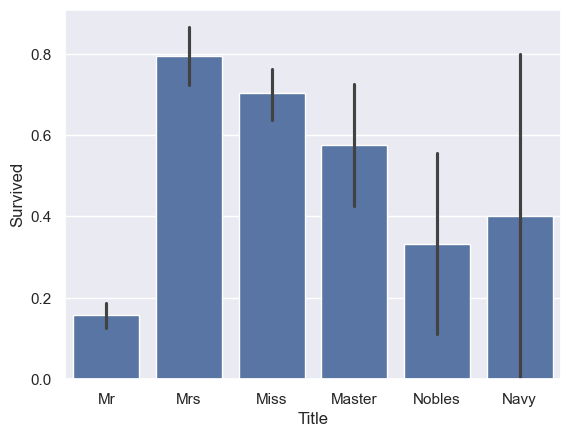

In [190]:
sns.barplot(x = 'Title', y = 'Survived', data = data)

In [192]:
nobles_survival = data[data.Title == "Nobles"].groupby(['Sex']).Survived.value_counts()
nobles_survival

Sex     Survived
female  1            3
male    0           12
        1            3
Name: count, dtype: int64

Indeed, there are only 3 females out of the 18 nobles and all of them survived! But that means there are 15 males and unfortunately, 12 of them died, which explains why our Nobles have so many deaths! Seems like even as a noble male, you do not get the priority pass to surviving on titanic.

### 4.3.4) Cabin <a id="cab"></a>



In [196]:
print('Missing values in Train set:', data.Cabin.isnull().sum())


Missing values in Train set: 687


Cabin has way too many missing values, it is not an easy task to imputate them.

In [199]:
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [201]:
def cabin_sep(data_cabin):
    cabin_type = []

    for i in range(len(data_cabin)):

            if data_cabin.isnull()[i] == True:
                cabin_type.append('M') #missing cabin = M
            else:
                cabin = data_cabin[i]
                cabin_type.append(cabin[:1])

    return cabin_type

# apply cabin sep on test and train set:
#train['cabin_type'] = cabin_sep(train.Cabin)
#Test['cabin_type'] = cabin_sep(Test.Cabin)


#train.head()

In [203]:
data['Cabin'] = data['Cabin'].fillna('M').astype(str).apply(lambda cabin: cabin[0])

There is one person on the boat deck in the T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A deck passengers, so he is grouped in A deck.

In [206]:
idx = data[data['Cabin'] == 'T'].index
data.loc[idx, 'Cabin'] = 'A'
data.Cabin.value_counts()


Cabin
M    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: count, dtype: int64

### 4.5) Encoding <a id="enc"></a>



Here is a brief overview of what encoding does, and the intuition behind it. It is a very basic idea and there is no hard and fast rule which encoding method to use for every question. But in general, that is a rules of thumb to follow: But always bear in mind not to employ any method blindly.

Always remember, you have to decide what encoding method to use before you run the model. For example, before you use random forest algorithm, you have to process the data into something the computer can understand. Here we introduce 2 ways of encoding.

---

- **Label Encoding:** For example, there is this feature called Embarked in our dataset, represented by "S", "C", "Q". Now the computer only likes to work with numbers, and as a result we need to convert S, C, Q into numbers. We can simply label $$S = 0, C = 1, Q = 2$$ and this is called Label Encoding (simply assigning numbers to the categorical variable in a sequential manner).

    However, Label Encoding has a big caveat, whenever you use this encoding method, the Embarked category now has a inherent ordered relationship; Signifying that C = 1 has more weight than S = 0, and Q = 2 has more weight than C = 1 and S = 0.

   The problem with this is when an algorithm (for eg, a logistic classification model makes USE OF THE WEIGHT in their calculation, and this is disastrous).

   The algorithm learns:
   
   $$\text{Prediction_of_survival_rate = weight_of_embarked * embarked + weight_of_gender * gender + ...... + bias}$$
   
   Now if you want to predict person A's survival rate based on the label encoding of where he/she embarked, you will have a problem.
   
   If person A comes from Southampton, and person B comes from Queenstown, both are of the same gender (Male) and let weight_of_embarked = 10, weight_of_gender = 20.
   
   Then the Prediction_of_survival_rate for person A = 10 * 0 + $\epsilon$ = $\epsilon$ and the Prediction_of_survival_rate for person B = 10 * 2 + $\epsilon$  = 20 + $\epsilon$ where $\epsilon$ is a positive number (representing weight_of_gender * gender but we know that the value for both is the same).
   
   So naturally, our model is gonna say that person B has a much higher survival rate than person A. I believe one can already get a feel of what is going wrong here. The caveat of Label Encoding is that we unknowingly assigned a hierarcy to each variable - signifying that an ordered relationship will not work properly in this situation. There are exceptions however, decision tree model is invariant to the encoding's order, so it may be fine to use Label Encoder, the rule of thumb is you have to know your algorithm does not depend on the "number" that is encoded.

        if embarked == 0 (aka = S) then
            do this decision
        elif embarked == 1 (aka = C) then
            do that decision
        elif embarked == 2 (aka = Q) then
            do last decision
  
    In the above example, we see that it does not matter what the embarked is encoded as, as it does not affect the end result.

---

- **One Hot Encoding**

[ref](https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179)

Initially, apple is labeled 1, chicken labeled as 2, broccoli labeled as 3. The idea now is that under the food name column, there are 3 categories, namely, apple, chicken and broccoli. Now for each category, we create an additional binary column for each category.

<br>

So back to our Titanic example, the column name (feature) is Embarked, with 3 categories inside, S, C and Q. Now with one hot encoding, the distance for S, C and Q are equal.

<br>

S: [1,0,0]

C: [0,1,0]

Q: [0,0,1]

So if we treat each of the above as a column vector, the distance between each pair of cities/Embarked is $\sqrt{2}$.
<br>


4. There is some caveats for one hot encoding. One is for the Sklearn package in python, Sklearn’s one hot encoder does not actually know how to convert categories to numbers, it only knows how to convert numbers to binary. We have to use the labelencoder first to convert categories to numbers.

    Also recognize that while one hot encoding reduces noise in your data that would have otherwise been cause by incorrect ordinal relationships, it also greatly increases the dimensionality of your data. High dimensionality has its own set of problems in machine learning, such as the curse of dimensionality. For example, if we were to think that ticket ID is important for our study, then there are literally 891 categories in the ticket ID feature. That would mean 891 new attributes/features after one hot encoding.
<br>

5. A general rule of thumb for Label Encoder vs One Hot encoder is as follows:

    i) If the categorical features are ordinal ones, use label encoder. For example, if I were to bin the Fare feature into category features such as: Cheap price, Normal price, Expensive price. Then it does make sense to say cheap = 0, normal = 1 and expensive = 2. However do note that LabelEncoder does not know what does 'cheap', 'normal' and 'expensive' mean. So it just assigns labels in order of appearance.

    ii) If non-ordinal relation, use one hot encoder.


We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions. In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

Encoding should be done after data cleaning, after all, it makes sense to fill in missing values first before encoding.

In [211]:
train_categorical_features = ['Pclass', 'Sex','Title','Cabin', 'Embarked']

# No need to use sklearn's encoders
# pandas has a pandas.get_dummies() function that takes in a series
#     and returns a HOT encoded dataframe of that series
#     use the add_prefix() method of dataframe to add the feature name in front of the category name
#     then join the dataframe sideways (similar to pd.concat([train, dummies], axis=1))
for feature in train_categorical_features:
    dummies = pd.get_dummies(data[feature]).add_prefix(feature + '_')
    data = data.join(dummies)

data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Navy,Title_Nobles,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,M,S,Braund,Mr,Braund Mr Owen Harris,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,M,S,Heikkinen,Miss,Heikkinen Miss Laina,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,M,S,Allen,Mr,Allen Mr William Henry,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,M,S,Montvila,Nobles,Montvila Rev Juozas,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S,Graham,Miss,Graham Miss Margaret Edith,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,M,S,Johnston,Miss,Johnston Miss Catherine Helen Carrie,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C,Behr,Mr,Behr Mr Karl Howell,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [213]:
# !pip install scikit-plot

## 5) Machine Learning Modelling <a id="model"></a>

In [1420]:
#importing from sklearn
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#import xgboost as xgb
from sklearn.metrics import roc_curve, auc
# import scikitplot as skplt #conda install -c conda-forge scikit-plot
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, accuracy_score

In [1421]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [1424]:
data.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### 5.0) Pre-Modeling Final Touch Up <a name="pre"></a>

### 5.0.1) Dropping Useless Features <a name="drop"></a>

Drop all the columns that is irrelevant. We already dropped ticket number and passenger ID earlier, now we proceed to drop the categorical columns that we have already converted to one hot encoder. For example, we do not wish to keep the sex column because one hot encoder has already split them into sex_female, sex_male.

In [1429]:
drop_column = ['Pclass','Name','Sex','Cabin', 'Embarked','Surname','Title','Newname']
data.drop(drop_column, axis=1, inplace = True)

In [1457]:
data = data.dropna()

### 5.0.2) Separating dependent and independent variables <a name="sep"></a>

In [1460]:
original_train_set_without_survived = data.drop("Survived", axis=1)
orginal_train_set_with_only_survived = data["Survived"]

original_train_set_without_survived.shape, orginal_train_set_with_only_survived.shape

((714, 5), (714,))

### 5.0.3) Train Test Split or Cross Validation <a name="split"></a>

Before performing out modelling to our test data, we can split the training data in two using train_test_split for training and testing your model.

**Training and Testing Sets**

   a) **Training data:** Training data is the information used to train an algorithm. The training data includes both input data and the corresponding expected output. We can train different machine learning algorithms on the training data, in the hopes of finding one best algorithm for a particular problem that predicts well. Bear in mind that even if our algorithm performs extremely well on the training data, it may be a result of overfitting, and may not replicate the same accuracy when the algorithm is applied to some unseen (test) data.

   b) **Testing data:** On the other hand, includes only input data, not the corresponding expected output. The testing data is used to assess how well your algorithm was trained, and to estimate model properties.


In [1463]:
#In this part, we will do the train test split.

x_train, x_test, y_train, y_test = train_test_split(
    original_train_set_without_survived, orginal_train_set_with_only_survived, train_size=0.8, test_size=0.2, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(571, 5) (571,)
(143, 5) (143,)


In [1465]:
x_train

,Age,SibSp,Parch,Ticket,Fare
387,36.0,0,0,27849,13.0000
685,25.0,1,2,SC/Paris 2123,41.5792
20,35.0,0,0,239865,26.0000
331,45.5,0,0,113043,28.5000
396,31.0,0,0,350407,7.8542
...,...,...,...,...,...
883,28.0,0,0,C.A./SOTON 34068,10.5000
238,19.0,0,0,28665,10.5000
789,46.0,0,0,PC 17593,79.2000
704,26.0,1,0,350025,7.8542


So the idea is we split our training data into 4 datasets, x_train means the training set without the outcome values (no survived column), x_train will serve as the training set. Now y_train set is the set of survived values corresponding to the x_train set. Similarly, we have **x_test which is also extracted from the training set (PAY SPECIAL ATTENTION THAT x_test IS NOT REFERRING TO THE TEST SET given to us)**, but serving the purpose as test set here. And y_test set is the set of survived values corresponding to the x_test set.

<br>

Now train_size = 0.8, test_size = 0.2 just means we split the data set into 80 percent of training data, and 20 percent test data.

<br>

Random_state is basically used for reproducing your problem the same every time it is run. If you do not use a randomstate in traintestsplit, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue. Note, it does not matter which integer value you use for random state, as long as you set it to one integer value and keep to it throughout.

<br>

However, there are many ways to **split** dataset, and sometimes other ways are superior. For example cross validation is a better way in general. However, in **Time Series** problems, train-test split or train-test-validation split might just prove to be superior because why would you care about errors in the past? You should care about errors you would make in the future. In that sense, you want to partition your dataset in past TS datapoints and the most current datapoints and perform MSE or Log Loss ( depending on whether this is classification or regression ) to evaluate how well your model can predict into the future.

<br>


**Cross Validation**

We talk about K-Fold Cross Validation (CV) first, note that there are many cross validation methods. But we have to start simple and talk about the easiest but also an efficient one here. K-Fold CV is literally performing train test split numerous times (or rather k times), but on different train test splits. If you have a data set of 1000, and set k = 10, then your dataset will be divided into 10 folds of dataset, with dataset 1 to dataset 10 each having 100 data inside. We will take dataset 1 to 9 as the "training set" and dataset 10 as the "test set" and perform the model on it, then we take dataset 1 to 8 and dataset 10 as the training set and let dataset 9 be the test set and perform the model on it. We do this iteratively (?) for 10 times until each dataset has been part of the training set. We will get 10 outputs of accuracy values and we take the average of them to be the final accuracy value.

<br>

Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data.

### 5.0.4) Feature Scaling <a name="scale"></a>

A common question when I encountered is whether you should do standardization/normalization prior to train test splitting, if we want to be careful, we should always do the standard scaler after train test splitting. i.e: After you applied train test split to x_train, x_test, we should apply scaling separately to x_train, x_test instead of applying scaling to the whole data set. Refer to https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data .

In [1469]:
# Feature Scaling
## We will be using standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
x_train = sc.fit_transform(x_train)
## transforming "test_x"
x_test = sc.transform(x_test)

ValueError: could not convert string to float: 'SC/Paris 2123'

In [1471]:
x_train

,Age,SibSp,Parch,Ticket,Fare
387,36.0,0,0,27849,13.0000
685,25.0,1,2,SC/Paris 2123,41.5792
20,35.0,0,0,239865,26.0000
331,45.5,0,0,113043,28.5000
396,31.0,0,0,350407,7.8542
...,...,...,...,...,...
883,28.0,0,0,C.A./SOTON 34068,10.5000
238,19.0,0,0,28665,10.5000
789,46.0,0,0,PC 17593,79.2000
704,26.0,1,0,350025,7.8542


In [1473]:
x_train.shape

(571, 5)

In [1475]:
x_test.shape

(143, 5)

### 5.0.5) Using train test split with Logistic Regression <a name="logreg"></a>

As an example for finding out the accuracy of the model using train test split method with Logistic Regression. We will cover on the work flow for Logistic Regression using the train test split method.

#### **Model Accuracy Score for Logistic Regression by using Train Test Split**

In [1479]:
## call on the model object
logreg = LogisticRegression()

## fit the model with "train_x" and "train_y"
logreg.fit(x_train, y_train)
#Alternatively also can use
#print ("So, Our accuracy Score is: {}".format(round(logreg.score(x_test,y_test),8)))

## Once the model is trained we want to find out how well the model is performing, so we test the model.
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome.
y_pred = logreg.predict(x_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing.

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test, y_pred),8)))

ValueError: could not convert string to float: 'SC/Paris 2123'

In [245]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [247]:
# logreg.predict_proba(x_test)

Import from sklearn.metrics import accuracy_score

<br>

Also, accuracy_score merely calculates the accuracy based on the inputs y_pred and y_true.
So in this case, our prediction is called y_pred, which takes in the input x_test, and recall x_test
refers to the partitioned x_test set taken from the training set; and recall we do know the true corresponding
output values for x_test, the output are in y_test.

<br>

Reiterating, y_pred takes in the input of x_test and runs in a model we choose, in which case
it is logistic regression: we use log reg to predict the x_test set.

<br>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

see example of how accuracy_score works.

#### **Confusion Matrix**

Note we want to use the confusion matrix on the test set (the test set is extracted from the dataset that we have, and we act as if we do not know the outcome of the test set, and use the model to predict the outcomes, after which we compare the predicted outcomes with the true outcomes and form the confusion matrix.

In [251]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm



confusion_matrix_model(logreg)

,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.16,0.84


#### **ROC Curve**

The concept of ROC and AUC builds upon the knowledge of Confusion Matrix, Specificity and Sensitivity. Also, the example that I will use in this article is based on Logisitic Regression algorithm, however, it is important to keep in mind that the concept of ROC and AUC can apply to more than just Logistic Regression.

<br>


A ROC curve shows you performance across a range of different classification thresholds and a confusion matrix only shows you one (typically when $\text{Pr}(y>0.5)$).

<br>

A confusion matrix can be used to measure the performance of a particular classifier with a fixed threshold. Given a set of input cases, the classifier scores each one, and score above the threshold are labelled Class 1 and scores below the threshold are labelled Class 2.

The ROC curve, on the other hand, examines the performance of a classifier *without fixing the threshold*. Given a set of input cases, the classifier scores each one. The ROC curve is then generated by testing every possible threshold and plotting each result as a point on the curve.

The ROC curve is useful when you want to test your classifier over a range of sensitivities/specificities. This may or may not be a desirable thing to do. Perhaps you want very high sensitivity and don't care much about specificity - in this case, the AUC metric will be less desirable, because it will take into account thresholds with high specificity. The confusion matrix, on the other hand, could be generated with a fixed threshold known to yield high sensitivity, and would only be evaluated for that particular threshold.

A confusion matrix evaluates one particular classifier with a fixed threshold, while the AUC evaluates that classifier over all possible thresholds.

LogisticRegression auc is 0.89517405


<Figure size 1000x900 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC for Logistic Regression (Titanic)')

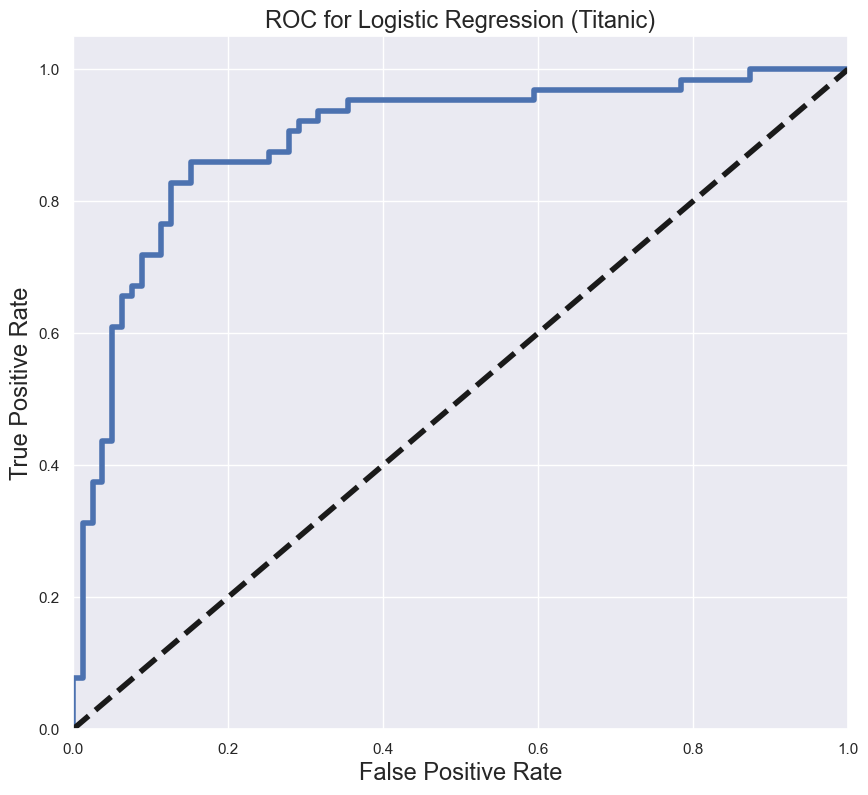

In [254]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(x_test) #y_pred_proba = logreg.predict_proba(X_test)[:, 1] same as this?

FPR, TPR, THR = roc_curve(y_test, y_score) #[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba) same as this
ROC_AUC = auc(FPR, TPR)
print (logreg.__class__.__name__+" auc is %2.8f" % ROC_AUC) #Gives AUC score.


#Next is draw roc graph.
plt.figure(figsize =[10,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.title('ROC for Logistic Regression (Titanic)', fontsize= 17)
plt.show()

<Figure size 1100x900 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Recall Curve for Titanic survivors')

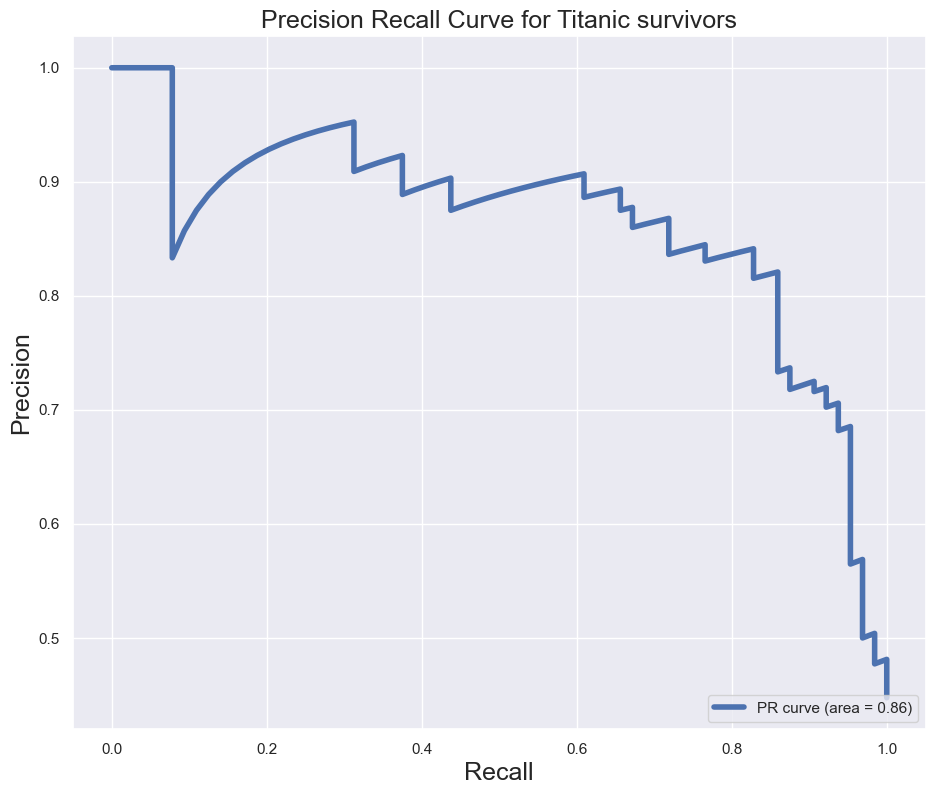

In [275]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

However, we wish to use Cross Validation to find out the accuracy scores, as demonstrated in the next section.

### 5.1) Logistic Regression by Cross Validation and Full Workflow  <a name="log"></a>

In this Section and Subsections, we will focus mainly on the work flow for the Logistic Regression Model by using cross validation method.

### 5.1.1) Step 1: Choosing Cross Validation Method  <a name="cv"></a>

As mentioned earlier, it is necessary to me that cross validation is a better method than merely splitting a data set once into train/test set. There are however a few cross validation methods and we will choose K-Fold method.

<br>


Here we choose the K-Fold method and let k = 10 and as usual, the data will be split into 10 folds and tested upon iteratively. However, for each fold, from fold 1 to fold 10, the variance of the accuracy may be big or small, depending on how stable our dataset. Now stable is a very vague word here, so I should give an example. For example, if our accuracy for each of the folds is as follows: [0.9, 0.88, 0.9, 0.92, 0.3, 0.6, 0.9, 0.91, 0.9, 0.88], then this is a bit weird because there are 2 folds in which our accuracy is significantly lower, this should raise an alarm and one should try to find out the reason why or even have to give up such algorithms with such high variances in between accuracies.

In [280]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [282]:
x = original_train_set_without_survived
y = orginal_train_set_with_only_survived

**Now remember our feature scaling earlier on train test split?**

However, be very careful that in K-Fold Cross Validation, we do not feature scale separately, this is because as explained earlier, in K-Fold we want to plug in the entire training set. So we shall perform the scaling on the set : **original_train_set_without_survived**

In [285]:
#normalize it by using our sc previously defined - where sc = StandardScaler()
x = sc.fit_transform(x)

### 5.1.2) Step 2: Accuracy of the Model <a name="Accuracy"></a>

After we choose our way to train the model and get the result and outcomes, it is natural for us to consider the performances of the model! Now the very first step we want to check is the accuracy of the model! The formula for accuracy is simply given by


$$\text{Accuracy} = \frac{\text{Number of correctly classified cases}}{\text{Number of all cases}}$$


<br>

And as seen in below, we first showed all our accuracy scores for each fold in the K-Fold CV validation, and the values are pretty close to each other with a standard deviation of 0.02733 - which in my opinion is a very acceptable range (one can further do some testing to show that the SD is justifiable low).

<br>

So our final accuracy score for Logistic Regression is 82.82 percent. But is that good enough? No. Let me give you one more problem.

<br>

For example, in our Titanic Problem, we want to classify data into survive or dead. And to make the example simple, we have 1000 data set in which we achieved an 80% accuracy, that is we predicted 800/1000 correctly. This 80% accuracy seems reasonable, but however it can still be extremely bad if we have many False Positives or False Negatives. In our case, let's say we have exactly 500 people who died and 500 people who lived - Our algorithm predicts 500/500 correctly for those people who survived, however only 300/500 correctly for those who died. Yes, the total accuracy does add up to 80 percent and it looks good on paper, but we realised that this algorithm is extremely incapable of prediction for people who died, and that can be a big problem because in reality, we may have say, 900 people who died and 100 who survived, one can imagine how disastrous it can be if we applied the algorithm and it will give you a much lower total accuracy rate!

<br>

We shall explore some popular metrics to further ASSESS THE PERFORMANCE of the model - An extension to evaluate how accurate the model performs.


We come up with a function called Acc_score that gives the mean of all cross validated scores through the CV K-Fold.

<br>

Note that cross_val_score is a in-built function which requires you to input the model you use, the dataset to train/fit without the output variable, which is our original_train_set_without_survived = x. Also we need y, which is our orginal_train_set_with_only_survived dataset. cv refers to the cross validation method.

<br>

Also take note our function below has an np.mean() inside. This means we are taking the average of all the cross val scores. One can remove np.mean and just merely return all the cross val scores in a list.

In [296]:
def Acc_score(model):
    return np.mean(cross_val_score(model, x, y, cv=k_fold, scoring="accuracy"))

In [300]:
logreg2 = LogisticRegression()

print("Accuracy Scores: " + format(cross_val_score(logreg2, x, y, cv=k_fold,scoring="accuracy")))
print(" ") #leave empty line
print("Mean Accuracy Score: " + str(Acc_score(logreg2)))
print(" ")
print("Standard Deviation:", cross_val_score(logreg2, x, y, cv=k_fold,scoring="accuracy").std())

Accuracy Scores: [0.83333333 0.875      0.81944444 0.77777778 0.84507042 0.77464789
 0.81690141 0.84507042 0.88732394 0.81690141]
 
Mean Accuracy Score: 0.8291471048513304
 
Standard Deviation: 0.03466221202299758


### 5.1.3) Step 3: ROC and AUC <a name="roc"></a>

Below is the code for averaging out 10 fold cross validation for AUC score.

In [303]:
scores_auc = cross_val_score(logreg2, x, y, cv=k_fold, scoring='roc_auc')
#Notice scoring = roc_auc now.  https://scikit-learn.org/stable/modules/model_evaluation.html
print("AUC score for 10 fold Cross Validation:", scores_auc)
print(" ")
print("Mean AUC score for 10 fold Cross Validation:", scores_auc.mean())

AUC score for 10 fold Cross Validation: [0.84577922 0.94208494 0.76425532 0.79347826 0.91774194 0.83814103
 0.87292359 0.87247475 0.90865385 0.8785461 ]
 
Mean AUC score for 10 fold Cross Validation: 0.8634078984966802


## 6) Other Machine Learning Models <a id="classifiers"></a>

### 6.1) Decision Tree<a name="rf"></a>


In [321]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_depth = range(1,30)
#max_feature = list(range(1,x.shape[1]+1)) #dynamic coding
max_feature = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,'auto'] #how one knows start at 21


criterion=["entropy", "gini"]

param = {'max_depth':max_depth,
         'max_features':max_feature,
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                param_grid = param,
                                 verbose=False,
                                 cv=KFold(n_splits=10, shuffle=True, random_state=42),
                                n_jobs = -1)
grid.fit(x, y)


print( grid.best_params_)
print(" ")
print (grid.best_score_)
print(" ")
print (grid.best_estimator_)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 'auto']},
             verbose=False)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 23}
 
0.8195226917057903
 
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=23,
                       random_state=42)


In [325]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score.
dectree_grid.score(x,y)

0.8375350140056023

### 6.2) Random Forest <a name="rf"></a>


In [328]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

rf_model.fit(x,y)


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'min_impurity_split'

In [ ]:
#print("%.3f" % rf_model.oob_score_)

In [ ]:
rf_model.score(x,y)

#### Submission for Random Forest Model

In [ ]:
Test = sc.fit_transform(Test)
Test1 = pd.read_csv("../input/titanic/test.csv")

output3 = pd.DataFrame({"PassengerId": Test1.PassengerId, "Survived":rf_model.predict(Test)})
output3.PassengerId = output3.PassengerId.astype(int)
output3.Survived = output3.Survived.astype(int)

output3.to_csv("output3.csv", index=False)
print("Your submission was successfully saved!")
output3.head(10)

Up until now, we have went through quite a detailed process. But in the end I went through you one single model - the most simple and powerful model - Logistic Regression **Also note that even logistic regression has many more things that I have yet to explain, like ridge/lasso regression - which can prevent overfitting**. I will continue and update it to explain other models like random forest and the likes - slowly progressing more complicated models. But always remember, start simple first, do not be greedy and attempt to understand all at one go.

This kernel is still updating in progress. It will be constantly updated with good information. **If you find it resourceful, or detailed, or lacking clarity on any aspect, please comment and let me know, I just want to be improve along with the rest.**

## 7) Part 1: Intuitive explanation of Logistic Regression <a id="ls"></a>

In this wall of text below, I provide beginners who have **less** rigorous mathematical background to gain an intuition on how logistic regression works. First and foremost, in number 1 I will have an extract from the classical machine learning book "An Introduction to Statistics" on why sometimes linear regression cannot work.

1. We have stated that linear regression is not appropriate in the case of a qualitative response. Why not? Suppose that we are trying to predict the medical condition of a patient in the emergency room on the basis of her symptoms. In this simplified example, there are three possible diagnoses: stroke, drug overdose, and epileptic seizure. We could consider encoding these values as a quantitative response variable, $Y$, as follows:

   \begin{equation}
     Y=\begin{cases}  
       1, & \text{if stroke}\\
       2, & \text{if drug overdose}\\
       3, & \text{if epileptic seizure}\\
     \end{cases}
   \end{equation}
   
   Using this coding, least squares could be used to fit a linear regression model to predict $Y$ on the basis of a set of predictors $X_{1}$, . . . , $X_{p}$. Unfortunately, this coding implies an ordering on the outcomes, putting drug overdose in between stroke and epileptic seizure, and insisting that the difference between stroke and drug overdose is the same as the difference between drug overdose and epileptic seizure. In practice there is no particular reason that this needs to be the case. For instance, one could choose an
    equally reasonable coding,

   \begin{equation}
     Y=\begin{cases}
       1, & \text{if epileptic seizure}\\
       2, & \text{if stroke}\\
       3, & \text{if drug overdose}\\
     \end{cases}
   \end{equation}

   which would imply a totally different relationship among the three conditions. Each of these codings would produce fundamentally different linear models that would ultimately lead to different sets of predictions on test observations.

   If the response variable's values did take on a natural ordering, such as mild, moderate, and severe, and we felt the gap between mild and moderate was similar to the gap between moderate and severe, then a 1, 2, 3 coding would be reasonable. Unfortunately, in general there is no natural way to convert a qualitative response variable with more than two levels into a quantitative response that is ready for linear regression.

   For a binary (two level) qualitative response, the situation is better. For instance, perhaps there are only two possibilities for the patient's medical condition: stroke and drug overdose. We could then potentially use the dummy variable approach to code the response as follows:

   \begin{equation}
     Y=\begin{cases}
       0, & \text{if stroke}\\
       1, & \text{if drug overdose}\\
     \end{cases}
   \end{equation}
   
   We could then fit a linear regression to this binary response, and predict drug overdose if $\hat{Y}>0.5$ and stroke otherwise. In the binary case it is not hard to show that even if we flip the above coding, linear regression will produce the same final predictions.

   For a binary response with a $0-1$ coding as above, regression by least squares does make sense; it can be shown that the $X\hat{\beta}$ obtained using linear regression is in fact an estimate of $\text{Pr}(\text{Drug Overdoes}~|~X)$ in this special case. However, if we use linear regression, some of our estimates might be outside the $[0$, 1$]$ interval , making them hard to interpret as probabilities!

   However, the dummy variable approach cannot be easily extended to accommodate qualitative responses with more than **two levels!!!** For these reasons, it is preferable to use a classification method that is truly suited for qualitative response values, such as the ones presented next.

2. Now we recall back in linear regression, we have independent input/variables $X$ and we seek a response/output variable $Y$. However in logistic regression, our output is in the form of a categorical variable. In our simple tutorial we will only be considering a binary output binary coded as 0 and 1.

   As mentioned in the previous paragraph, we cannot use linear regression to predict a categorical output even if the categorical output is coded as numerical values, especially in such a classification problem with many levels in a categorical variable. As a result, we need to come up with a slightly different **hypothesis** to model our relationship for $X$ and $Y$.

   As with any modelling, there should be a "formula" between the $X$ and the $Y$. However, we have already established it is not easy to obtain an direct equation between $X$ and $Y$. Instead, in logistic regression, we are more interested in having a relation between $X$ and $P(Y = 1 ~|~ X)$. One should immediately be asking, what and why is $P(Y=1~|~X)$? Let me give you an intuition by the following example.

3. **Example**: We are trying to predict if a person has malignant tumor or not based on some inputs such as "Tumor Size" and etc. For simplicity sake, we only deal with one variable: The "Tumor Size" $X$.

   Our output $Y$ is basically encoded as a binary class where **Yes it is Malignant Tumor** stands for 1 and **No it is not a Malignant Tumor** stands for 0. Consider the data set above, where the response "$Y$ = Malignant" falls into one of two categories, Yes (1) or No (0). As mentioned in the previous paragraph, rather than modeling this response $Y$ directly with $X$, logistic regression models the probability that $Y$ belongs to a particular category. One can see the from the below figure, the first row says that the tumour size is 1 cm and our data says that the patient's tumour is not malignant (thank god!). But as we said, we want the probability of the tumour being malignant **given** $X = 1$cm. So we write down the probability as shown below (just get this intuition first and don't wonder how are we going to find the probability first!).

    ![1](https://raw.githubusercontent.com/ghnreigns/imagesss/master/logistic-8.jpg)

   For this, in a simple (one variable only) logistic regression model, we can define our output $Y$ as a probability defined as $$P(Y=1~|~ X)$$
    
   **So to reiterate, instead of modelling our $Y$ directly with $X$, we aim to find a model that can model the probability of $Y$ given $X$.** But why? How does getting a probability help us? Although it should be obvious that $P(Y=1~|~X)$ should fall in between $0$ and $1$ since it is a probability, **but** it does not answer our question of whether you are in class 1 or 0 because ultimately, we are interested in finding out our output value which is either a 1 or a 0.

   I DO NOT CARE if you told me you found that  $P(Y=1~|~X =1.1 \text{ cm}) = 0.2349538$ which is neither 0 or 1? So this is where **classification threshold** comes in. You need to pre-define a threshold (default is usually 0.5). As a result, if we use a classification threshold of 0.5, then we will predict a $Y = \text{Yes } (1)$ for any $P(Y=1|~X) > 0.5$. To write it more compactly, we define the following indicator function. (For more experienced peeps, there is connection with AUC,ROC curves here as well!)

   \begin{equation}
     Y=\begin{cases}
       1, & \text{if $P(Y=1~|~X) \geq 0.5$}\\
       0, & \text{if $P(Y=1~|~X < 0.5$}\\
     \end{cases}
   \end{equation}
   
   As a result if your tumour size is 1.1 cm, then the probability of your tumour is malignant is $0.2349538$, which is less than 0.5 and we predict your as a No (not malignant). However, the threshold is there for a reason, usually, in medical and healthcare industry, we tend to be more conservative with our predictions as we have 0 tolerance for False Negatives. We rather give you a false alarm than to classify you as No Malignancy when in fact you are already at the last stage of your life. So we can tune and change our threshold to something like $P(Y=1~|~X) >0.1$ and in this case, $0.2349538$ will be in the Yes class.

   I know we are going off the tracks, but I hope I have provided you with some intuition on how modelling the $P(Y=1~|~X)$ as a function of $X$ makes sense here.

4. **Hypothesizing and Modelling the Logistic Function:** For simplicity we call our function $P(Y=1~|~ X)$ as the function $p(X)$ and we seek to find a relationship between $p(X)$ and $X$. Although we have gone through a lot of ideas just now, it would be meaningless if we cannot find a suitable function (equation) to model $p(X)$ and $X$.

   **Hypothesis 1: The Linear Hypothesis**

   Hmm, so we got quite some success hypothesizing linear regression models with linear functions, can we try that too on $p(X)$ and $X$? Consider that we "guess/hypothesize" that $p(X)$ have a **linear relationship** with $X$ as follows:

    $$p(X) = \beta_0+\beta_1 X$$

   However the problem with this modelling is that for very large Tumour sizes $X$, say $X=10 \text{ cm}$, then our $p(X)$ may take values greater than $1$. And for extremely small Tumour sizes $X$, say those very small benign lumps, which may be $X=0.05 \text{ cm}$ in size, then $p(X)$ may take negative values. In any case, no matter how likely or unlikely one is to find his/her tumour to be malignant, how big or small the tumour size is, our $p(X)$ should only output values between $0$ and $1$ because $p(X)$ is a probability. Hence our linear model may be accurate to a certain extent, but not sensible.

   **Hypothesis 2**

   Instead of the linear hypothesis, we come up with another one, recall that we learnt that probability and odds have similar definition. And recall that $$\text{odds} = \dfrac{P(Y=1~|~X)}{1-P(Y=1~|~X)}$$

   So why not model the odds against $X$? If we can successfully do that, then we can easily get the probability $P(Y=1~|~X)$ since odds and probability are in a if and only if relationship. So let us try: $$\text{odds} = \dfrac{p(X)}{1-p(X)} = \beta_0 + \beta_1X$$

   But ALAS! We soon realise that the odds can only take on values from $0$ to $\infty$, but the problem still exists for the $\beta_0 + \beta_1X$ since some $X$ values can output negative values.

   But we are close, and if one has **some** mathematical backgrounds, then we know that if we take the log or ln of $\text{odds}$ then we can have the desired results.

   **Hypothesis 3: The Chosen one**

   If we finally consider the modelling of the logarithm of the odds, against the variable $X$, where we still assume a linear relationship, then we may be good to go because the logarithm of the odds gives a range of $-\infty$ to $\infty$ and matches well with $\beta_0+\beta_1X$.      

   With this we have achieved a regression model, with the output of the model being the logarithm or ln of the odds. i.e: the modelled equation is as follows:

    $$\ln\left(\dfrac{p(X)}{1-p(X)}\right) = \beta_0+\beta_1X$$

   The main reason we reach this step is because both sides of the equation can take in the same range, and thus makes more mathematical sense now. We have yet to estimate or found what the coefficients $\beta_0, \beta_1$ are. This is just a logical and sound hypothesis.

   **Recovering the Logistic Function from log odds**

   So in the previous paragraph we have settled on a hypothesis that there is a **linear relationship** between the predictor variable $X$ and the **log-odds** of the event that $Y=1$. However, do not forget what our original aim is, we modelled log odds against $X$ simply because the relationship can be mathematically justified, we ultimately want to find the probability of $Y=1$ given $X$. And that is easy, by some reverse engineering, once $\beta_0, \beta_1$ are fixed, we do some manipulation:

    
$$\ln\left(\dfrac{p(X)}{1-p(X)}\right) = \beta_0+\beta_1X \iff  \dfrac{p(X)}{1-p(X)} = \exp{(\beta_0+\beta_1X)}   \iff p(X)  = \dfrac{\exp{(\beta_0+\beta_1X)}}{\exp{(\beta_0+\beta_1X)}+1} \iff p(X) = \dfrac{1}{1+\exp^{-1}{(\beta_0+\beta_1X)}}$$


   **Given the log odd mode (logit model actually), we can recover the probability of $Y=1$ given $X$ for each $X$.**


5.  **Important - The workflow process of Logistic Regression**

    - Given an indepedent variable $X$, we aim to predict a binary dependent variable $Y$.

    - It is not easy to model a relationship between $X$ and $Y$ directly, instead, we find the probability of $Y = 1$ given $X$ instead. Imagine we are in the shoes of the famous statistician DR Cox in the year 1958, we are building logistic regression from scratch, and we tried to hypothesize that the probability $p(X) = P(Y=1~|~X)$ can be modelled the same way as **linear regression?** But soon realised that modelling $p(X) = \beta_0+\beta_1X$ is not good since its range gives values out of $[0,1]$. In order to overcome this we can make a transformation and fit the sigmoid/logistic function which forces the output $p(X)$ to be in $[0,1]$.

    - Since the transformation may not be intuitive, I have made a simple explanation above, and showed steps on how to model $P(X)$ as a sigmoid function.

        Sigmoid in logistic regression:

    $$p(X) = \dfrac{1}{1+\exp^{-1}{(\beta_0+\beta_1X)}}$$

    - So, we have effectively build a model, and in fact it is a probabilistic model behaving as a bernoulli distribution. To recover the probability $p(X)$, we have to estimate the coefficients (parameters) in $$p(X) = \dfrac{1}{1+\exp^{-1}{(\beta_0+\beta_1X)}}$$ and we use a method called **Maximum Likelihood (I will do a part 2 on this as it is also a big topic)**.

    - Once we recover the coefficients $\beta_0, \beta_1$, we can simply plug in the coefficients and the respective values of $X$ to get $p(X)$.

    - Once we get the $p(X)$, we can define a indicator function as our classification threshold (mentioned earlier) and subsequently, get all the values of $Y$.

## 8) Part 2: Maximum Likelihood  <a id="ls2"></a>

First you need to be very clear about what a **probability distribution is.** Consider that we have 10 students and we model their marks where the full marks of the test is 16/16. Define a random variable $X$ where $X$ represents the marks of each student. Assume further that this **random variable** $X$ is following a **normal distribution** with $\mu = 11$ and $\sigma = 3$, can we find the probability distribution for the marks of the whole cohort (10 students)? Yes we can, because we have the parameters. If you do not know what is the meaning of parameters, please go revise on it, it is very important for you to understand that the **parameter** decides the probability distribution of any model.

Recall the general formula for the pdf of the normal distribution is $$f(X = x) = \dfrac{e^{-(x-\mu)^2}/(2\sigma^2)}{\sigma \sqrt{2\pi}}$$
and in normal distribution once we have the mean and standard deviation of the dataset, we can recover the whole pdf of the model, hence the mean and standard deviation are our parameters.  So let us say we want to find $P(11 < X < 13~|~\mu = 11, \sigma = 3)$, we can easily find it to be around $0.31 = 31\%$, we can basically find any probabilities **as long as we are given the parameters**. So, **we must have the correct mindset that,** probability density functions (or pmf alike) are legitimate functions that takes in any $X = x$ and outputs the probability of this $x$ **happening**. (Of course in continuous distribution we are usually only interested in the range of $x$, but for the purpose of intuition, we do not need to be so pedantic).

**Likelihood Function**

However, in the real world setting, more often than not, we have the data $X$, like we have conveniently the scores of all the 10 students above, which **could be a random sample taken** from the whole school's population. Now we are tasked to find the probability distribution of the whole population (say 10,000 students), and we would have calculate it ever so easily **if we knew what the parameters were!?** Unfortunately we do not have the true parameters.

Our main motivation now is to find the **parameter**, because without it, we cannot complete the task of finding the distribution of the population. We can never know the real/true parameter $\theta = (\mu, \sigma)$, but we can obtain a good estimator of it, by making use of the data that we do have! In this scenario we were given 10 data points (in real life it is usually much more), say the 10 data points are $$\mathbf{X} = [3,9,4,10,12,16,5,11,9,9]$$

So we do a sleight of hand using our original **probability density function**, $P(X = x~|~ \theta)$. Instead of being a function of $X = x$ where $\theta$ is known, we instead let $X = x$ be fixed, and let $\theta$ be the variable now. The idea is that this function now is **NO LONGER a function of** $X=x$, and is instead a function of $\theta$, where it takes in all possible values of $\theta$, and outputs a value called the \textbf{likelihood value.} So now, in a less informal way, our new function looks like $$P(\mathbf{X} = [3,9,4,10,12,16,5,11,9,9]~|~ \theta)$$ and it means **what is the probability of OBSERVING these data points, given different values of theta.** One needs to plot the graph of likelihood out to get a better idea (Wikipedia).  

So imagine our function (plot likelihood value vs parameter) has a local/global maximum, and that maximum is what we are finding ultimately. Because it is reasonable for us to believe that, the **parameter** that gives us the maximum value of $P(\mathbf{X} = [3,9,4,10,12,16,5,11,9,9]~|~ \theta)$ will suggest that **given these 10 data points**, this $\theta$ that we just found, gives us the highest **likelihood/probability** that these 10 points are actually observed.

We formally define this function to be $$\mathcal{L}(\theta~|~ X = x) = P(X = x~|~\theta) $$

I cannot emphasize enough that even those the likelihood function $\mathcal{L}$ and the probability function $P$ have the exact same form, they are fundamentally different in which one is a function of the parameter $\theta$, and the other is a function of the data points $X = x$.

**Maximizing the likelihood function**

Many of us may not have rigourous mathematical background, and hence when I said we are trying to find the value of $\theta$ that maximizes $\mathcal{L}$, we might be stunned, indeed, the most intuitive way is to try out every possible theta and see which theta gives us the highest value; or if you can try differentiating $\mathcal{L}$ and set the derivative to $0$ to solve for $\theta$. In any case, our intuition is to maximize this function. We will illustrate the idea of maximum likelihood with a simple example below.

**Example**

Inspired and credits to [Jonny Brooks-Bartlett](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1) as the example is almost similar.

- Let's say we have a population of 1000 students and a random sample of 3 university students are taken with their respective marks for a Machine learning test. The data are distributed below in python (generate some data of 3 students marks).
    
- First, we always have to come up with a hypothesized model first, and in this case, based on these 3 sample data points, we make a simple plot and since the plot looks somewhat normal, we hypothesize that our model should be of a normal distribution (do be reminded this is just for illustration, 3 points may be too little for us to hypothesize a model in many scenarios).
    
- Our aim is to come up with a normal distribution for this 1000 students marks. In order to do that, we need to find the parameters and recall that in normal distribution, our parameters are the mean $\mu$ and the standard deviation  $\sigma$. So we have to find the best parameters that best describe our observed 3 sample points.
    
- Note that from our previous section, we know that we just need to maximize the likelihood function given by $$\mathcal{L}\left(\theta = (\mu, \sigma)~|~ X = [9,9.5,11]\right) = P\left(X = [9,9.5,11]~;~ \theta = (\mu, \sigma)\right)$$

- Here the author made a very good point that we shall use ; instead of | to indicate probability function. However some people like to use | as probability function can be described in a conditional way.
    
- And since our assumption that this 3 data points are independent of each other, our joint pdf equation can be simplified to
    
    
$$P\left(X = [9,9.5,11]~;~ \theta = (\mu, \sigma)\right) = P(9;\theta = [\mu, \sigma]) \cdot P(9.5;\theta = [\mu, \sigma]) \cdot  P(11;\theta = [\mu, \sigma]) = \dfrac{1}{\sigma\sqrt{2\pi}}\exp\left(-\dfrac{(9-\mu)^2}{2\sigma^2}\right) \cdot \dfrac{1}{\sigma\sqrt{2\pi}}\exp\left(-\dfrac{(9.5-\mu)^2}{2\sigma^2}\right) \cdot \dfrac{1}{\sigma\sqrt{2\pi}}\exp\left(-\dfrac{(11-\mu)^2}{2\sigma^2}\right)~~~~~~~~(2.1)$$

Equation 2.1 above is the joint probability of observing these 3 points and is a function of the parameters, so we suffice to find the parameters that maximize this function. So the intuition is to differentiate equation 2.1 and set it to 0, and solve for the parameter $\theta$.

- However, the expression in 2.1 is very difficult to differentiate, and that is why it is very common to see we take log/ln on both sides of the expression

$\ln\mathcal{L} = \ln\left[\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(9-\mu)^2}{2\sigma^2}\right) \cdot \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(9.5-\mu)^2}{2\sigma^2}\right) \cdot \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(11-\mu)^2}{2\sigma^2}\right) \right]$

and instead maximize the new log-likelihood function instead. But some may be confused, when we solve the \textbf{parameters} for the above equation, will our parameter still be the one that actually maximizes our equation 2.1? Yes, it does, the proof can be found here (for those who are curious). [proof](https://math.stackexchange.com/questions/647835/why-does-finding-the-x-that-maximizes-lnfx-is-the-same-as-finding-the#_=_)

- We simplify the above $\ln\mathcal{L}$ function to get $$\ln\mathcal{L} = -3\ln(\sigma)-1.5\ln(2\pi) - \frac{1}{2\sigma^2}\left[(9-\mu)^2+(9.5-\mu)^2+(11-\mu)^2\right]~~~(2.2)$$

- We take the partial derivatives with respect to $\mu$ and $\sigma$ respectively and set to $0$ to solve equation 2.2, thereby getting our $\theta$.

$$\dfrac{\partial \ln(\mathcal{L})}{\partial \mu} = \dfrac{1}{\sigma^2}[9+9.5+11-3\mu] = 0 \implies \mu = 9.833$$

$$\dfrac{\partial \ln(\mathcal{L})}{\partial \sigma} = -\dfrac{3}{\sigma} + 4\sigma^{-3}\left[(9-\mu)^2+(9.5-\mu)^2+(11-\mu)^2\right] =0 \implies \sigma = 1.7$$

- So now we have found the estimate of the real parameter of the population, and we can therefore infer that our populations' probability density function.

- However, we are not really done yet, this example was easy and therefore can be calculated with hand. In reality, there is no closed form solution expression for the coefficient values that maximize the likelihood function, so that an iterative process must be used instead; for example Newton's method. This process begins with a tentative solution, revises it slightly to see if it can be improved, and repeats this revision until no more improvement is made, at which point the process is said to have converged.(Wikipedia)

**It is important to realise that if convergence for the model is not reached, the coefficients/parameters you obtained may not be meaningful. Therefore, certain assumptions need to be fulfilled for logistic regression.**

**Assumptions of logistic regression and Regularization will be mentioned in part III, which is also the final part of the Logistic Regression Trilogy**.